In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from pptx import Presentation
from pptx.util import Inches, Pt
from pptx.enum.text import PP_ALIGN
import os

# ==========================================
# SETUP
# ==========================================
# Create a folder for images if it doesn't exist
IMG_DIR = "project_images"
os.makedirs(IMG_DIR, exist_ok=True)

# Set Plot Style for "Beautiful" aesthetics
sns.set_style("whitegrid")
plt.rcParams.update({'figure.figsize': (10, 6), 'figure.dpi': 300})

print("Step 1: Loading Data...")
# NOTE: Ensure these CSV files are in your working directory
try:
    layoffs = pd.read_csv("layoffs.csv")
    jobs = pd.read_csv("jobs_in_data.csv")
except FileNotFoundError as e:
    print(f"Error: {e}. Please ensure csv files are in the folder.")
    exit()

# ==========================================
# DATA CLEANING & PREPARATION
# ==========================================
print("Step 2: Cleaning Data...")

# --- Process Layoffs Data ---
layoffs['date'] = pd.to_datetime(layoffs['date'])
layoffs['year'] = layoffs['date'].dt.year
layoffs['month'] = layoffs['date'].dt.month
layoffs['year_month'] = layoffs['date'].dt.to_period('M').astype(str)

# --- Process Jobs Data ---
jobs["work_year"] = jobs["work_year"].astype(int)
jobs = jobs.dropna(subset=["salary_in_usd"])

# Cleanup categorical columns for cleaner labels
def clean_labels(df, col):
    df[col] = df[col].str.strip().str.title()
    return df

jobs = clean_labels(jobs, "job_category")
jobs = clean_labels(jobs, "experience_level")
jobs = clean_labels(jobs, "work_setting")

# Ordering experience for logical plotting
exp_order = ["Entry-Level", "Mid-Level", "Senior", "Executive"]
# Map raw values if they match your csv specific format (e.g. 'Entry-level' vs 'Entry Level')
# Adjusting based on standard Kaggle dataset norms:
jobs['experience_level'] = jobs['experience_level'].replace({'En': 'Entry-Level', 'Mi': 'Mid-Level', 'Se': 'Senior', 'Ex': 'Executive'})


Step 1: Loading Data...
Step 2: Cleaning Data...


Step 3: Generating Visualizations...


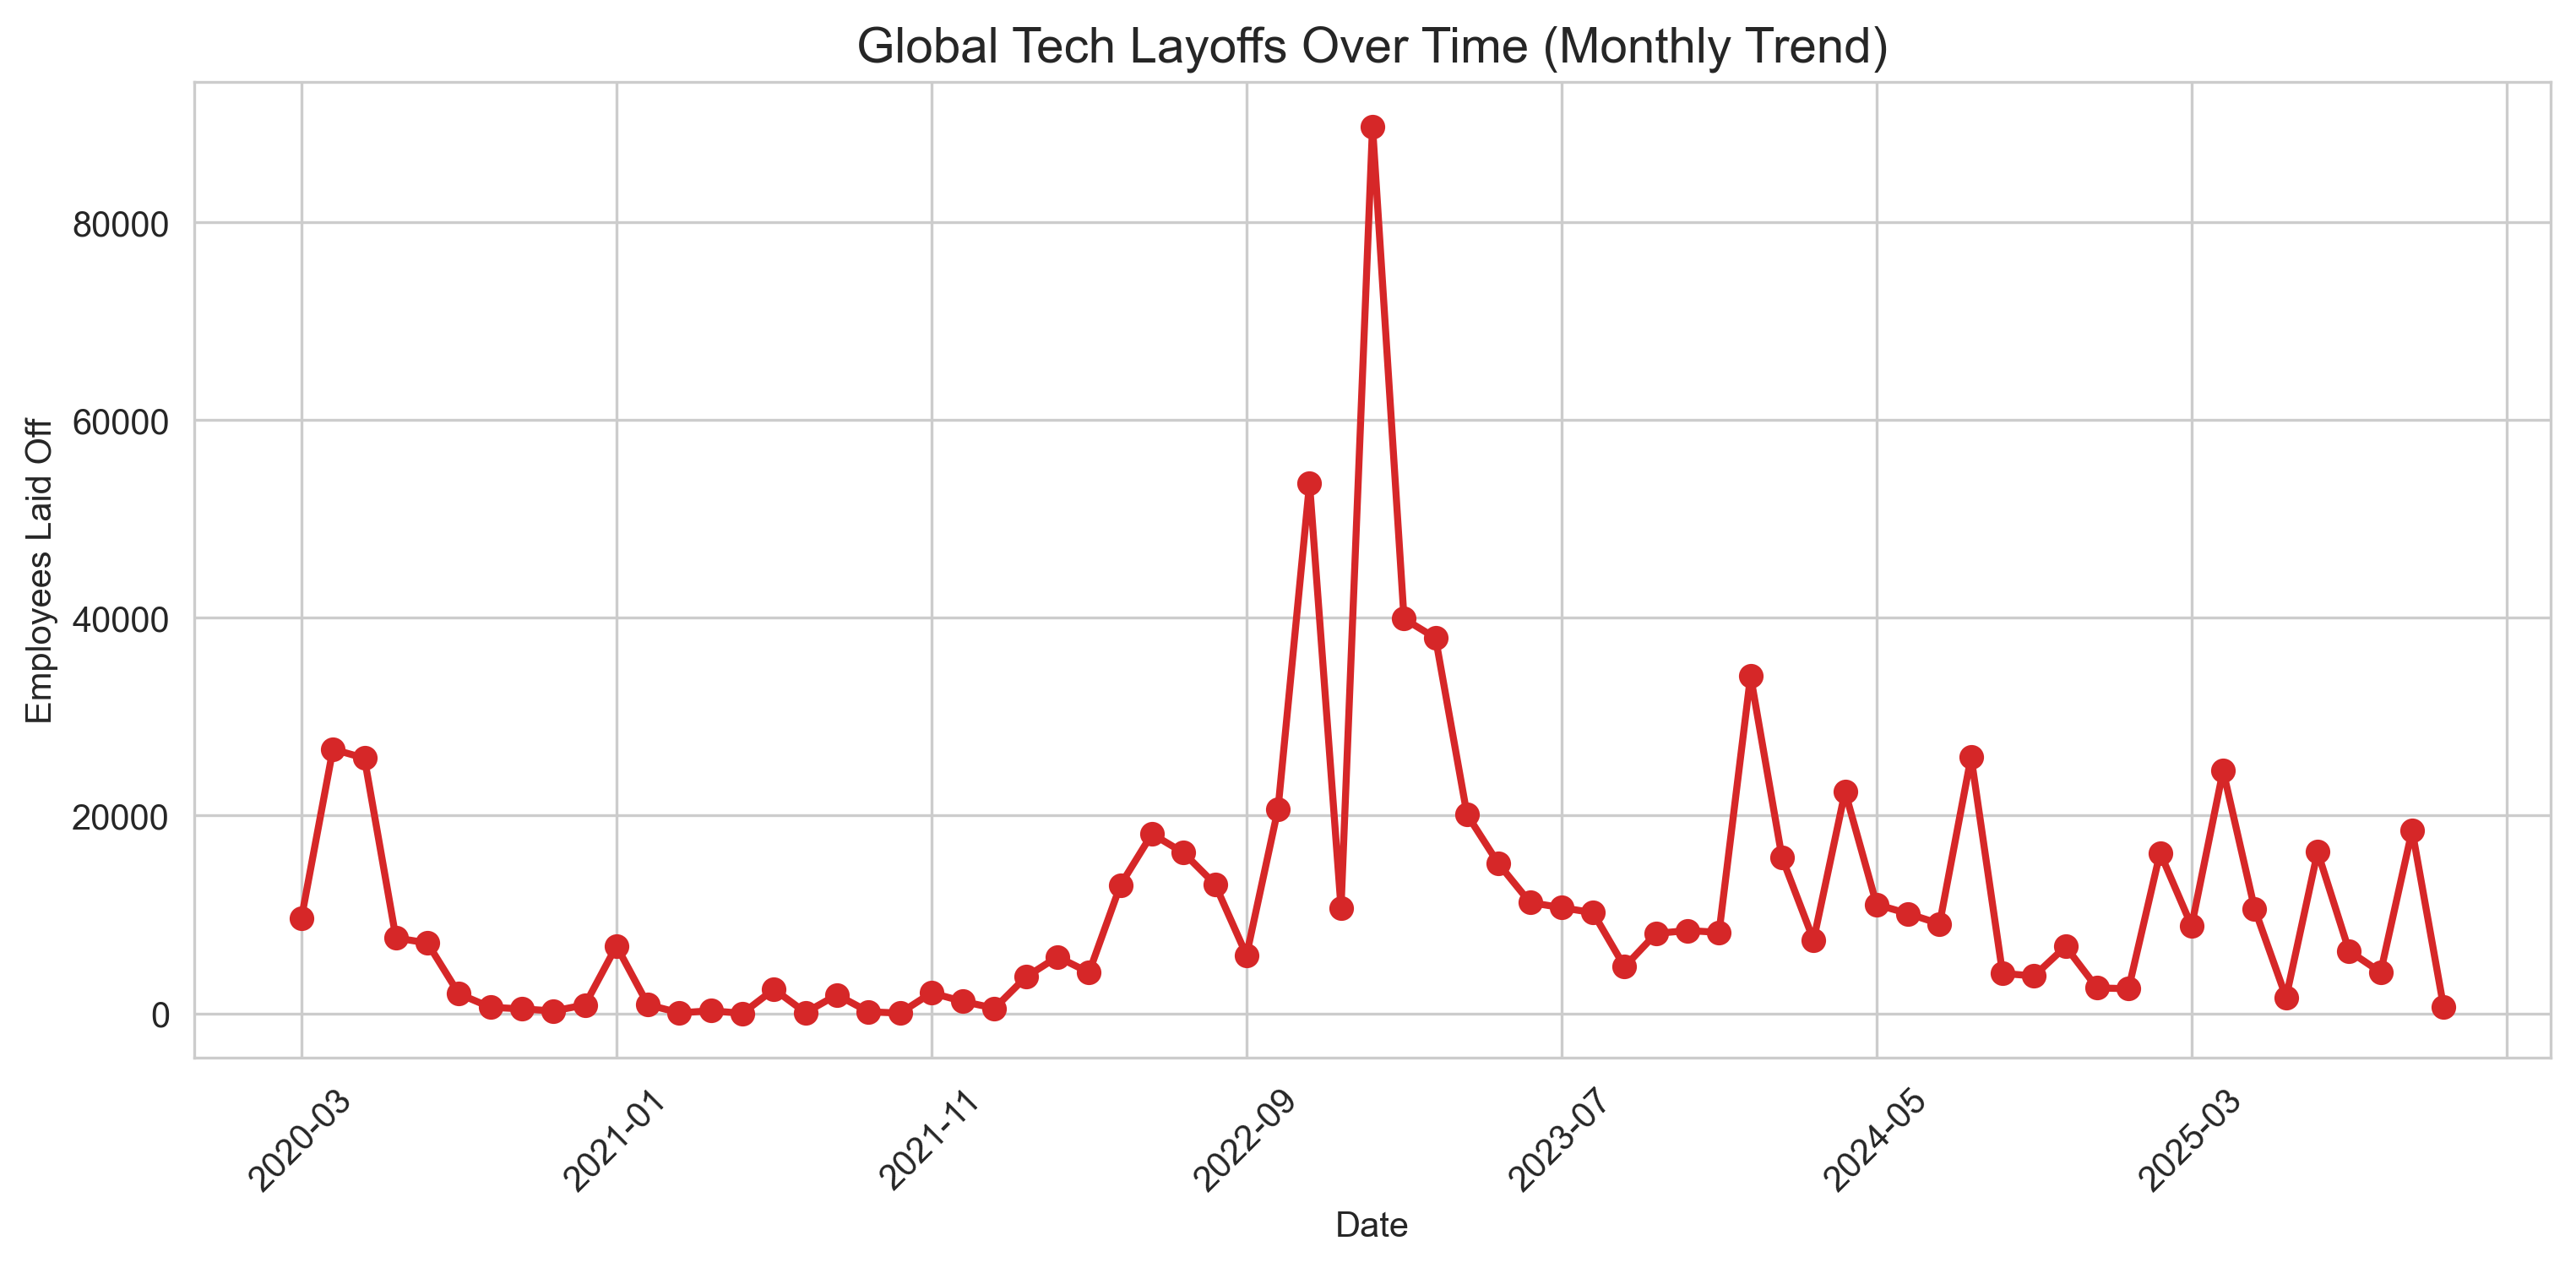

Saved Slide_06_LayoffsMonthly.png


In [2]:


# ==========================================
# IMAGE GENERATION
# ==========================================
print("Step 3: Generating Visualizations...")

def save_plot(filename):
    plt.tight_layout()
    plt.savefig(os.path.join(IMG_DIR, filename), bbox_inches='tight')
    plt.close()
    print(f"Saved {filename}")

# --- Image 1 (Slide 6): Layoffs Monthly Trend ---
monthly_layoffs = layoffs.groupby('year_month')['total_laid_off'].sum().dropna()
plt.figure(figsize=(12, 5))
monthly_layoffs.plot(kind='line', marker='o', color='#d62728', linewidth=2)
plt.title('Global Tech Layoffs Over Time (Monthly Trend)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Employees Laid Off')
plt.xticks(rotation=45)
plt.show()
save_plot("Slide_06_LayoffsMonthly.png")


/var/folders/40/sdhd020s23j5xmv9v34h73pm0000gn/T/ipykernel_77549/1722586799.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=yearly_layoffs.index, y=yearly_layoffs.values, palette="Reds")


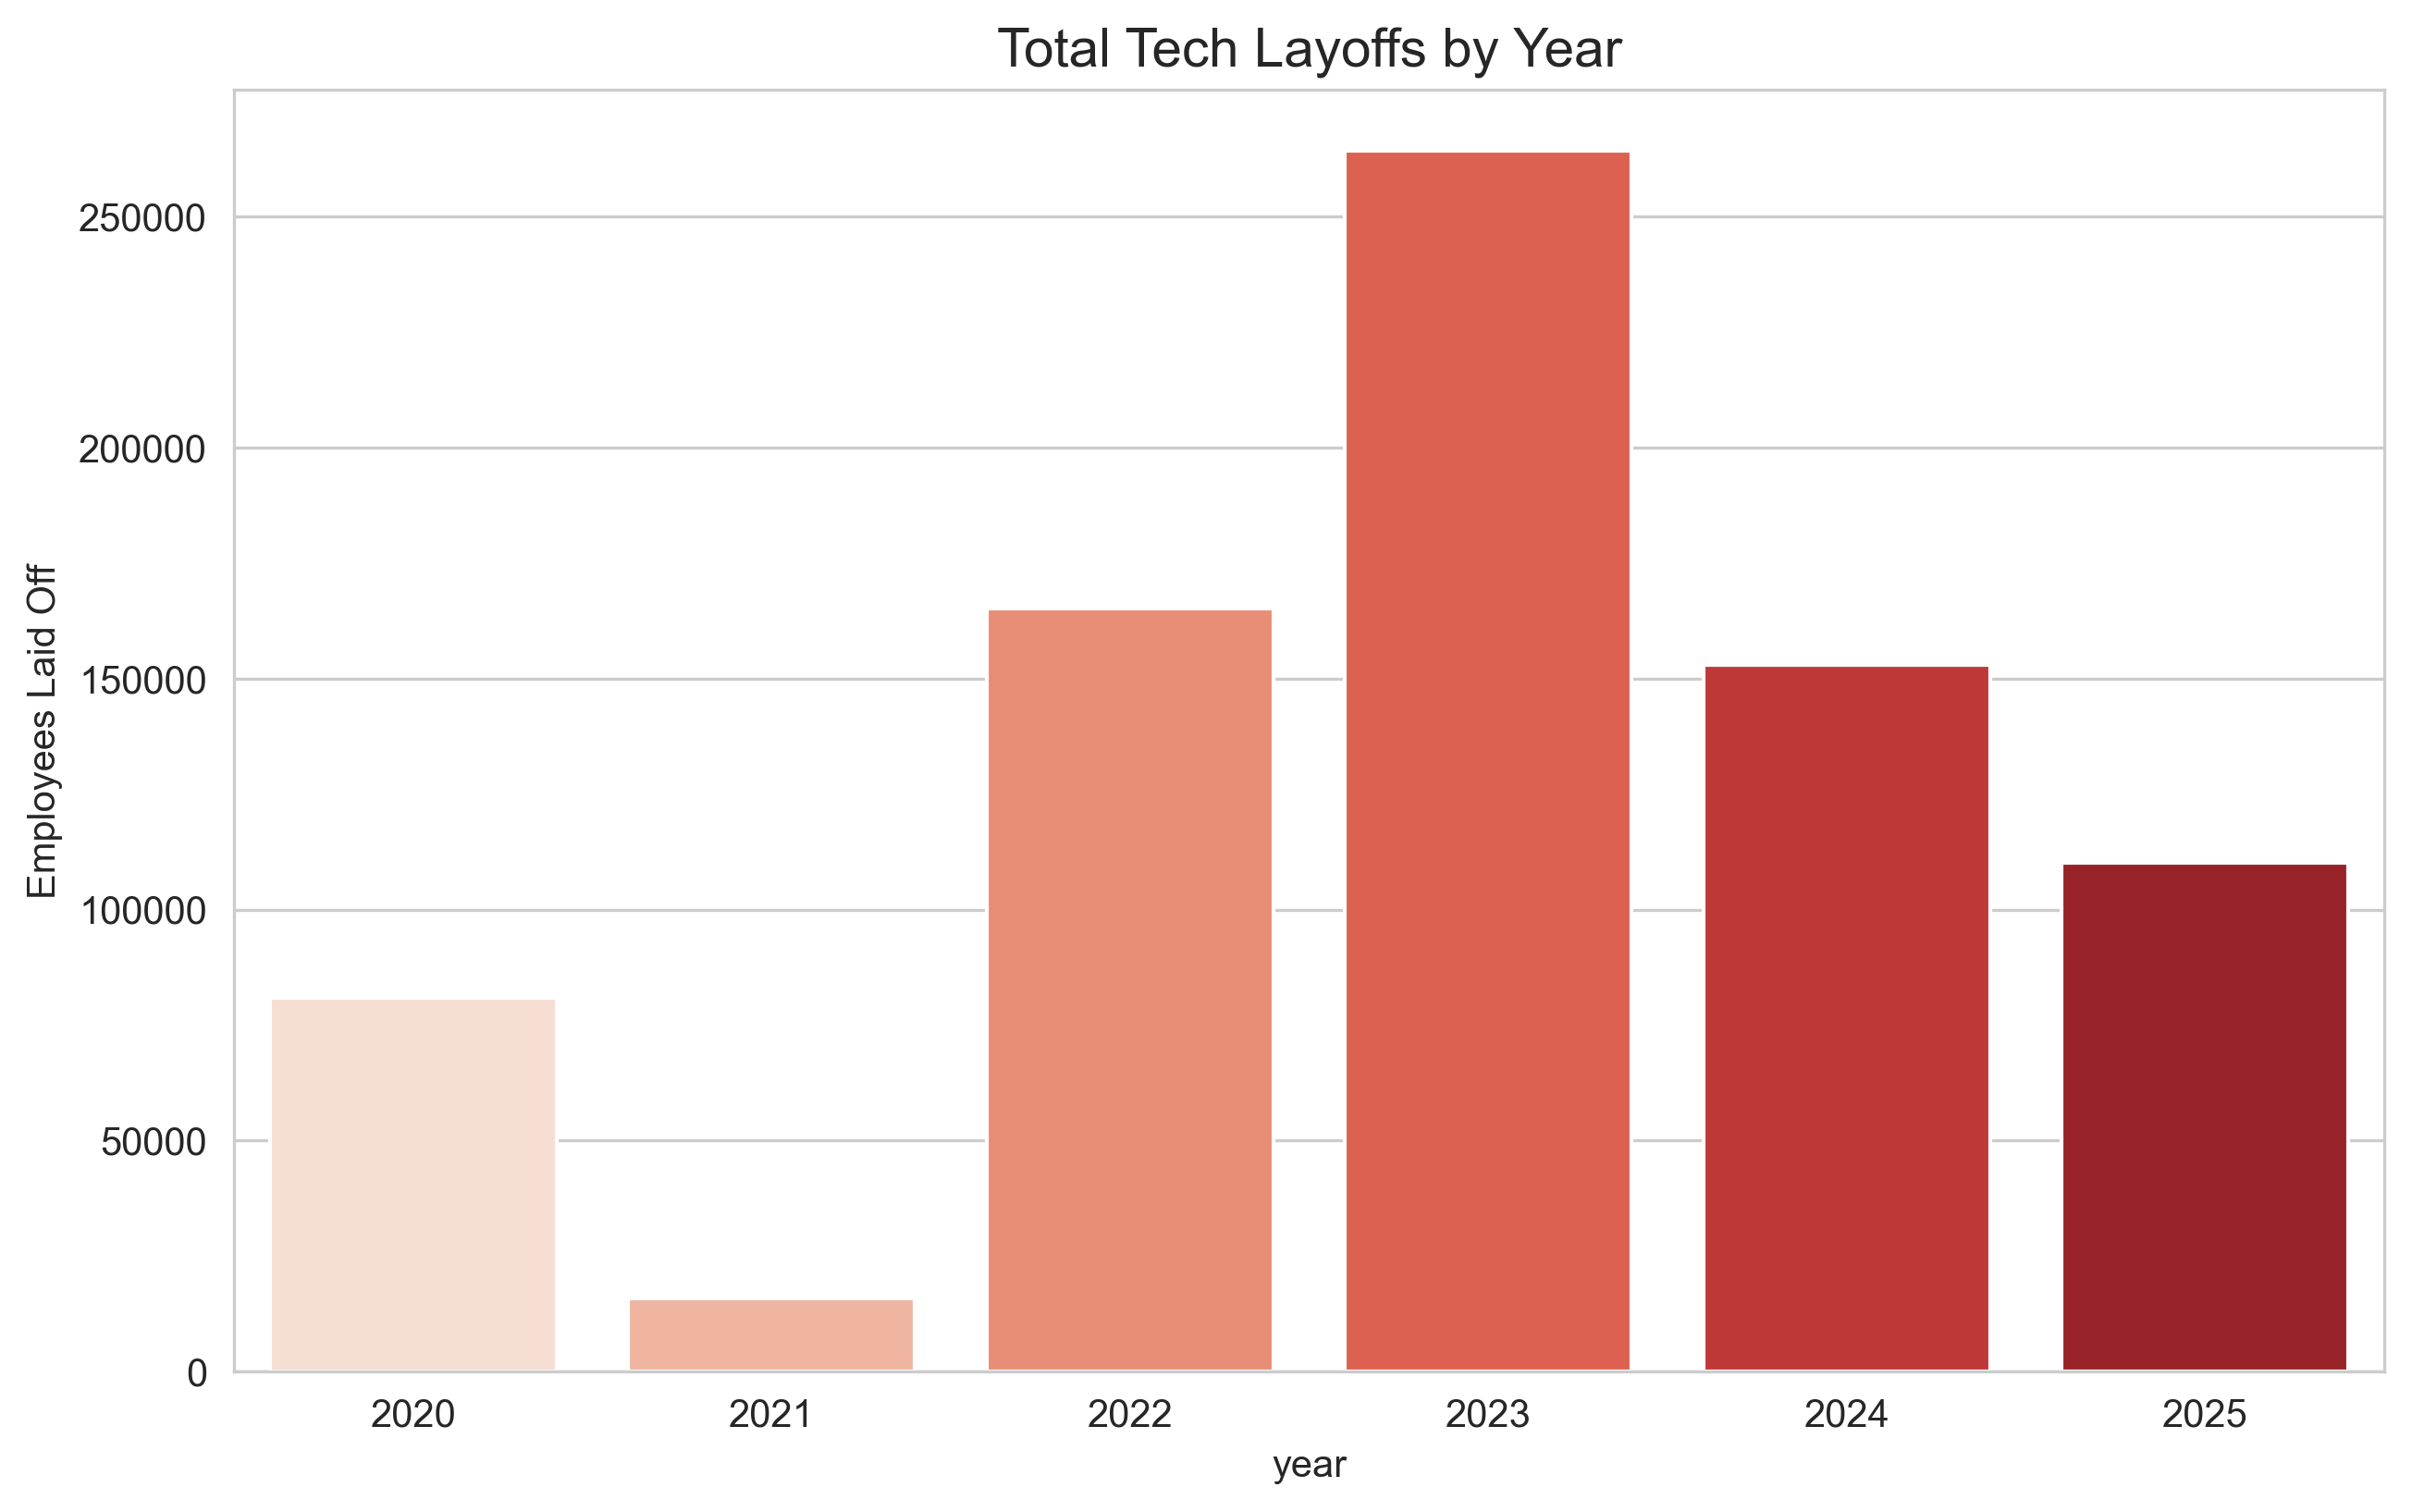

Saved Slide_07_LayoffsYearly.png


In [4]:

# --- Image 2 (Slide 7): Yearly Layoffs ---
yearly_layoffs = layoffs.groupby('year')['total_laid_off'].sum()
plt.figure()
sns.barplot(x=yearly_layoffs.index, y=yearly_layoffs.values, palette="Reds")
plt.title('Total Tech Layoffs by Year', fontsize=14)
plt.ylabel('Employees Laid Off')
plt.show()
save_plot("Slide_07_LayoffsYearly.png")


/var/folders/40/sdhd020s23j5xmv9v34h73pm0000gn/T/ipykernel_77549/3148666292.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_companies.index, x=top_companies.values, palette="viridis")


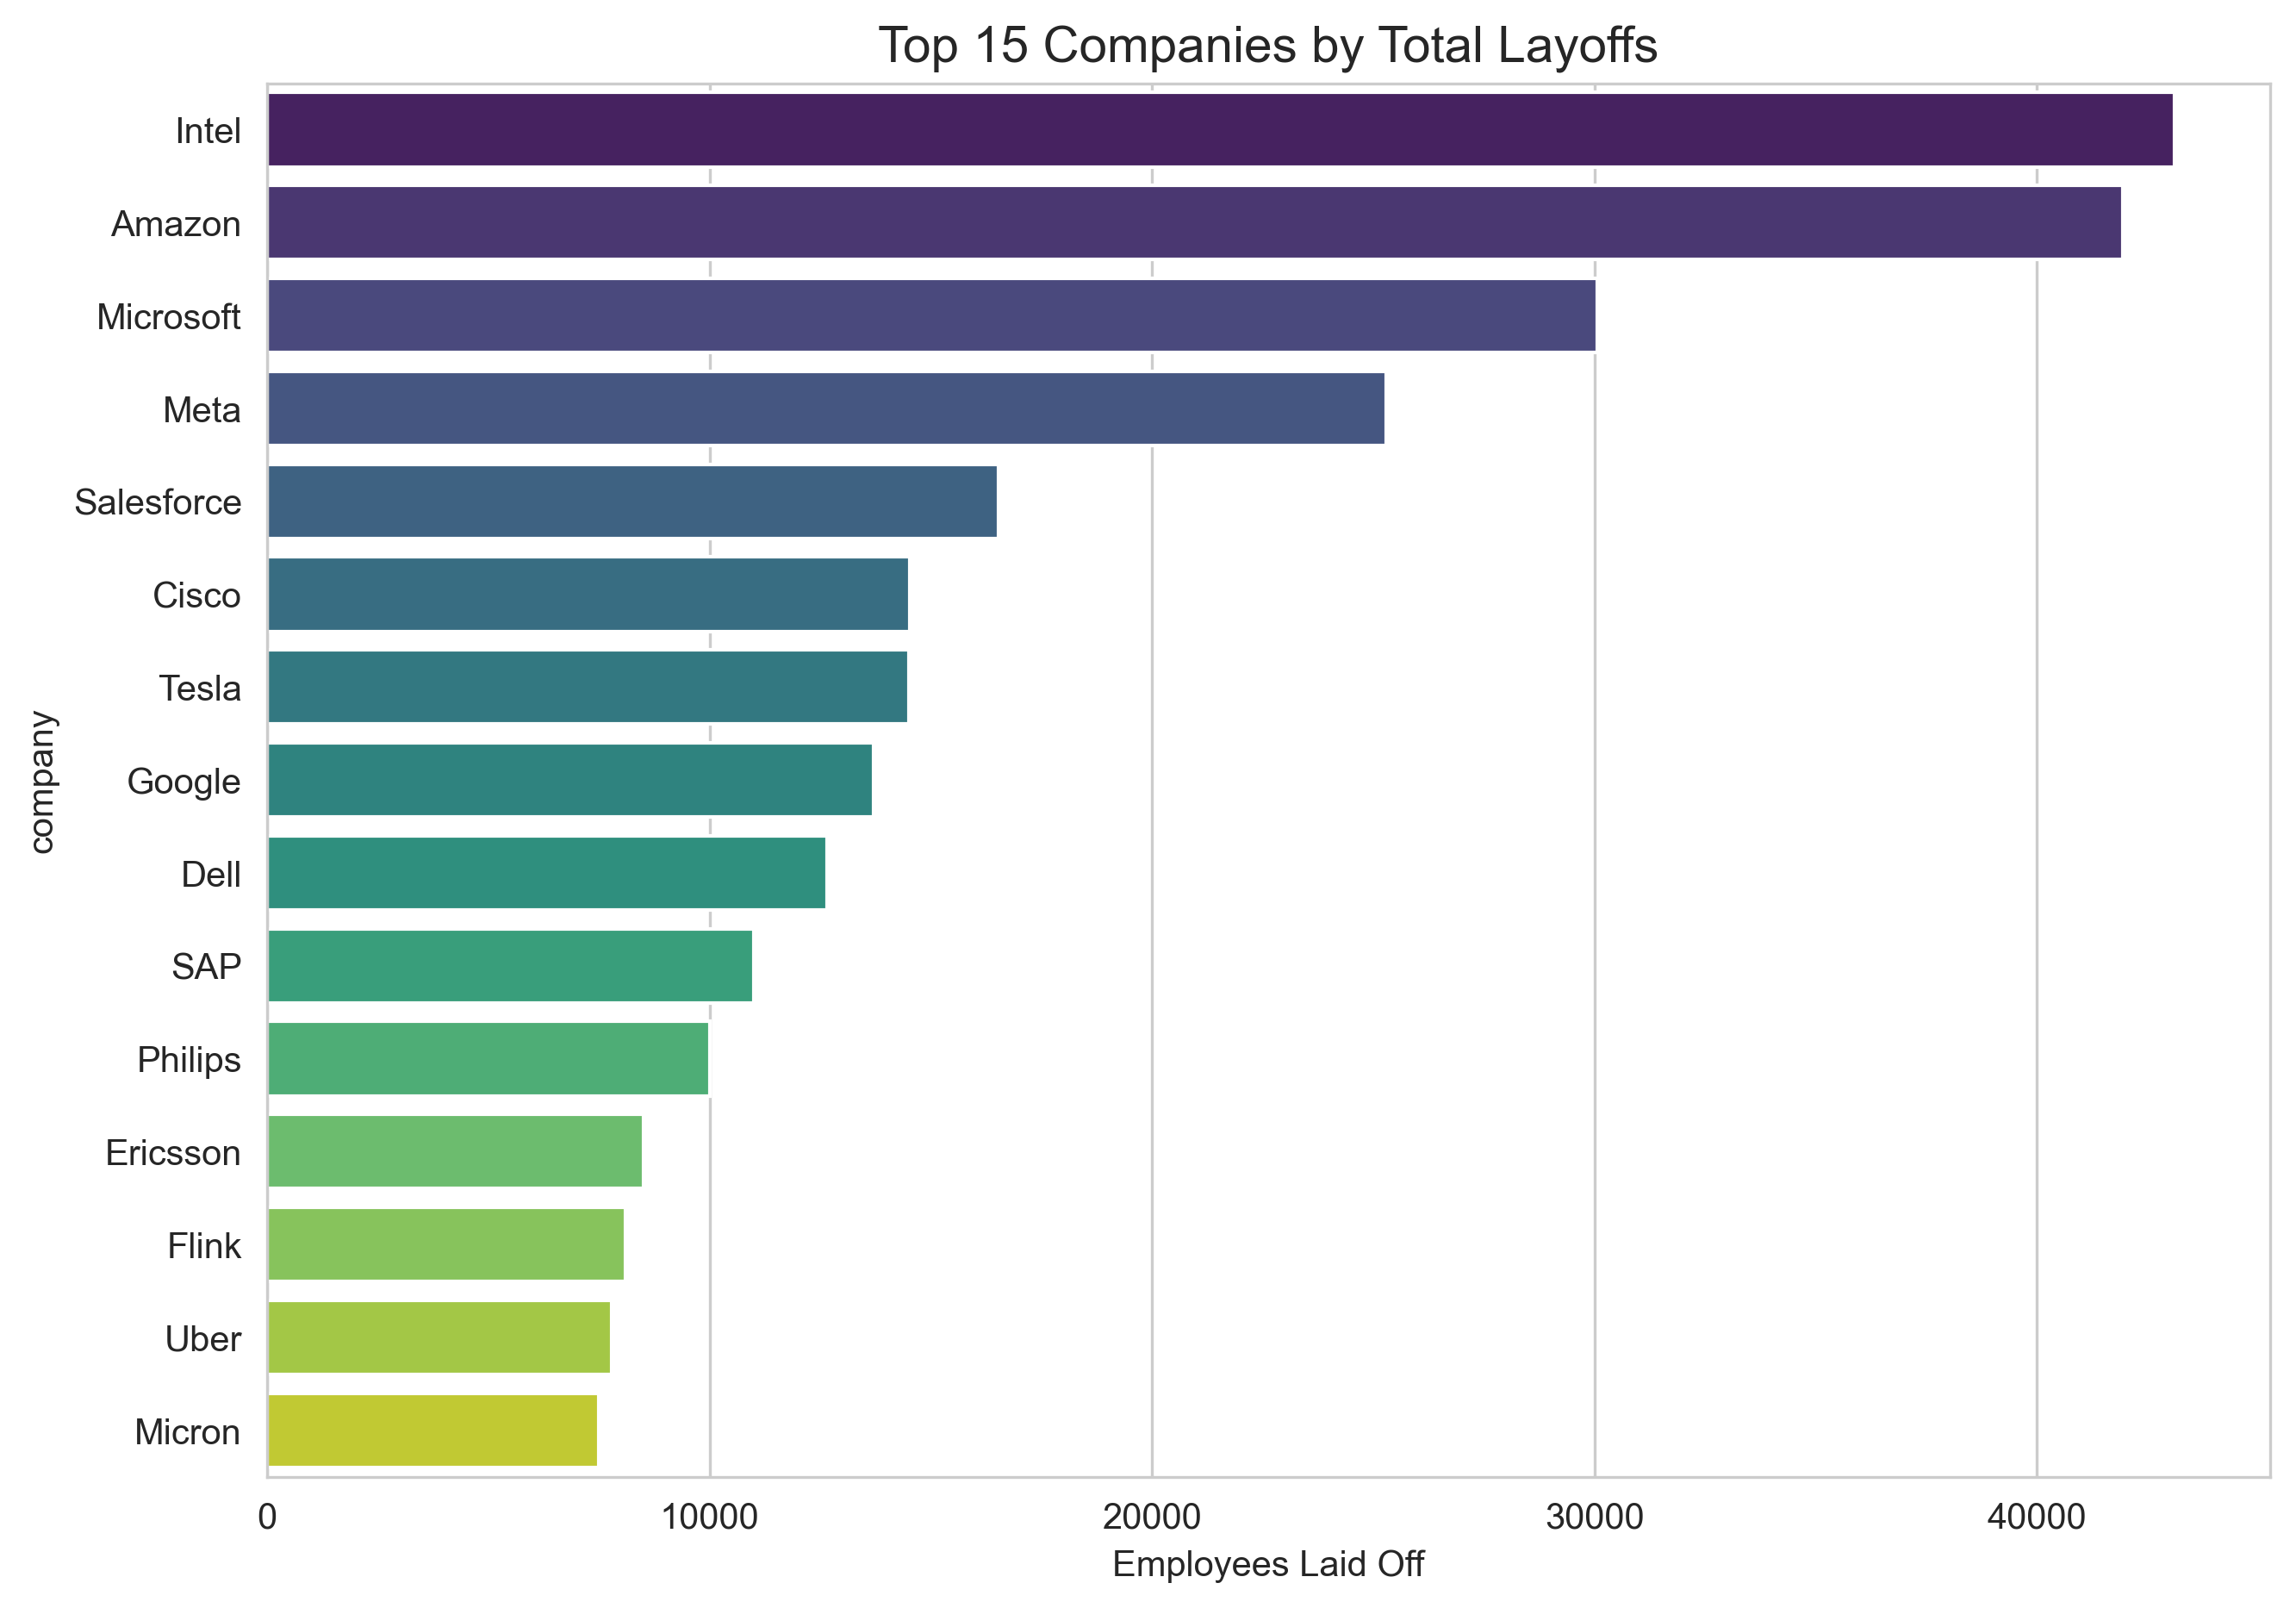

Saved Slide_08_TopCompanies.png


In [5]:

# --- Image 3 (Slide 8): Top 15 Companies ---
top_companies = layoffs.groupby('company')['total_laid_off'].sum().sort_values(ascending=False).head(15)
plt.figure(figsize=(10, 7))
sns.barplot(y=top_companies.index, x=top_companies.values, palette="viridis")
plt.title('Top 15 Companies by Total Layoffs', fontsize=14)
plt.xlabel('Employees Laid Off')
plt.show()
save_plot("Slide_08_TopCompanies.png")


/var/folders/40/sdhd020s23j5xmv9v34h73pm0000gn/T/ipykernel_77549/714033985.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=ind_layoffs.index, x=ind_layoffs.values, palette="magma")


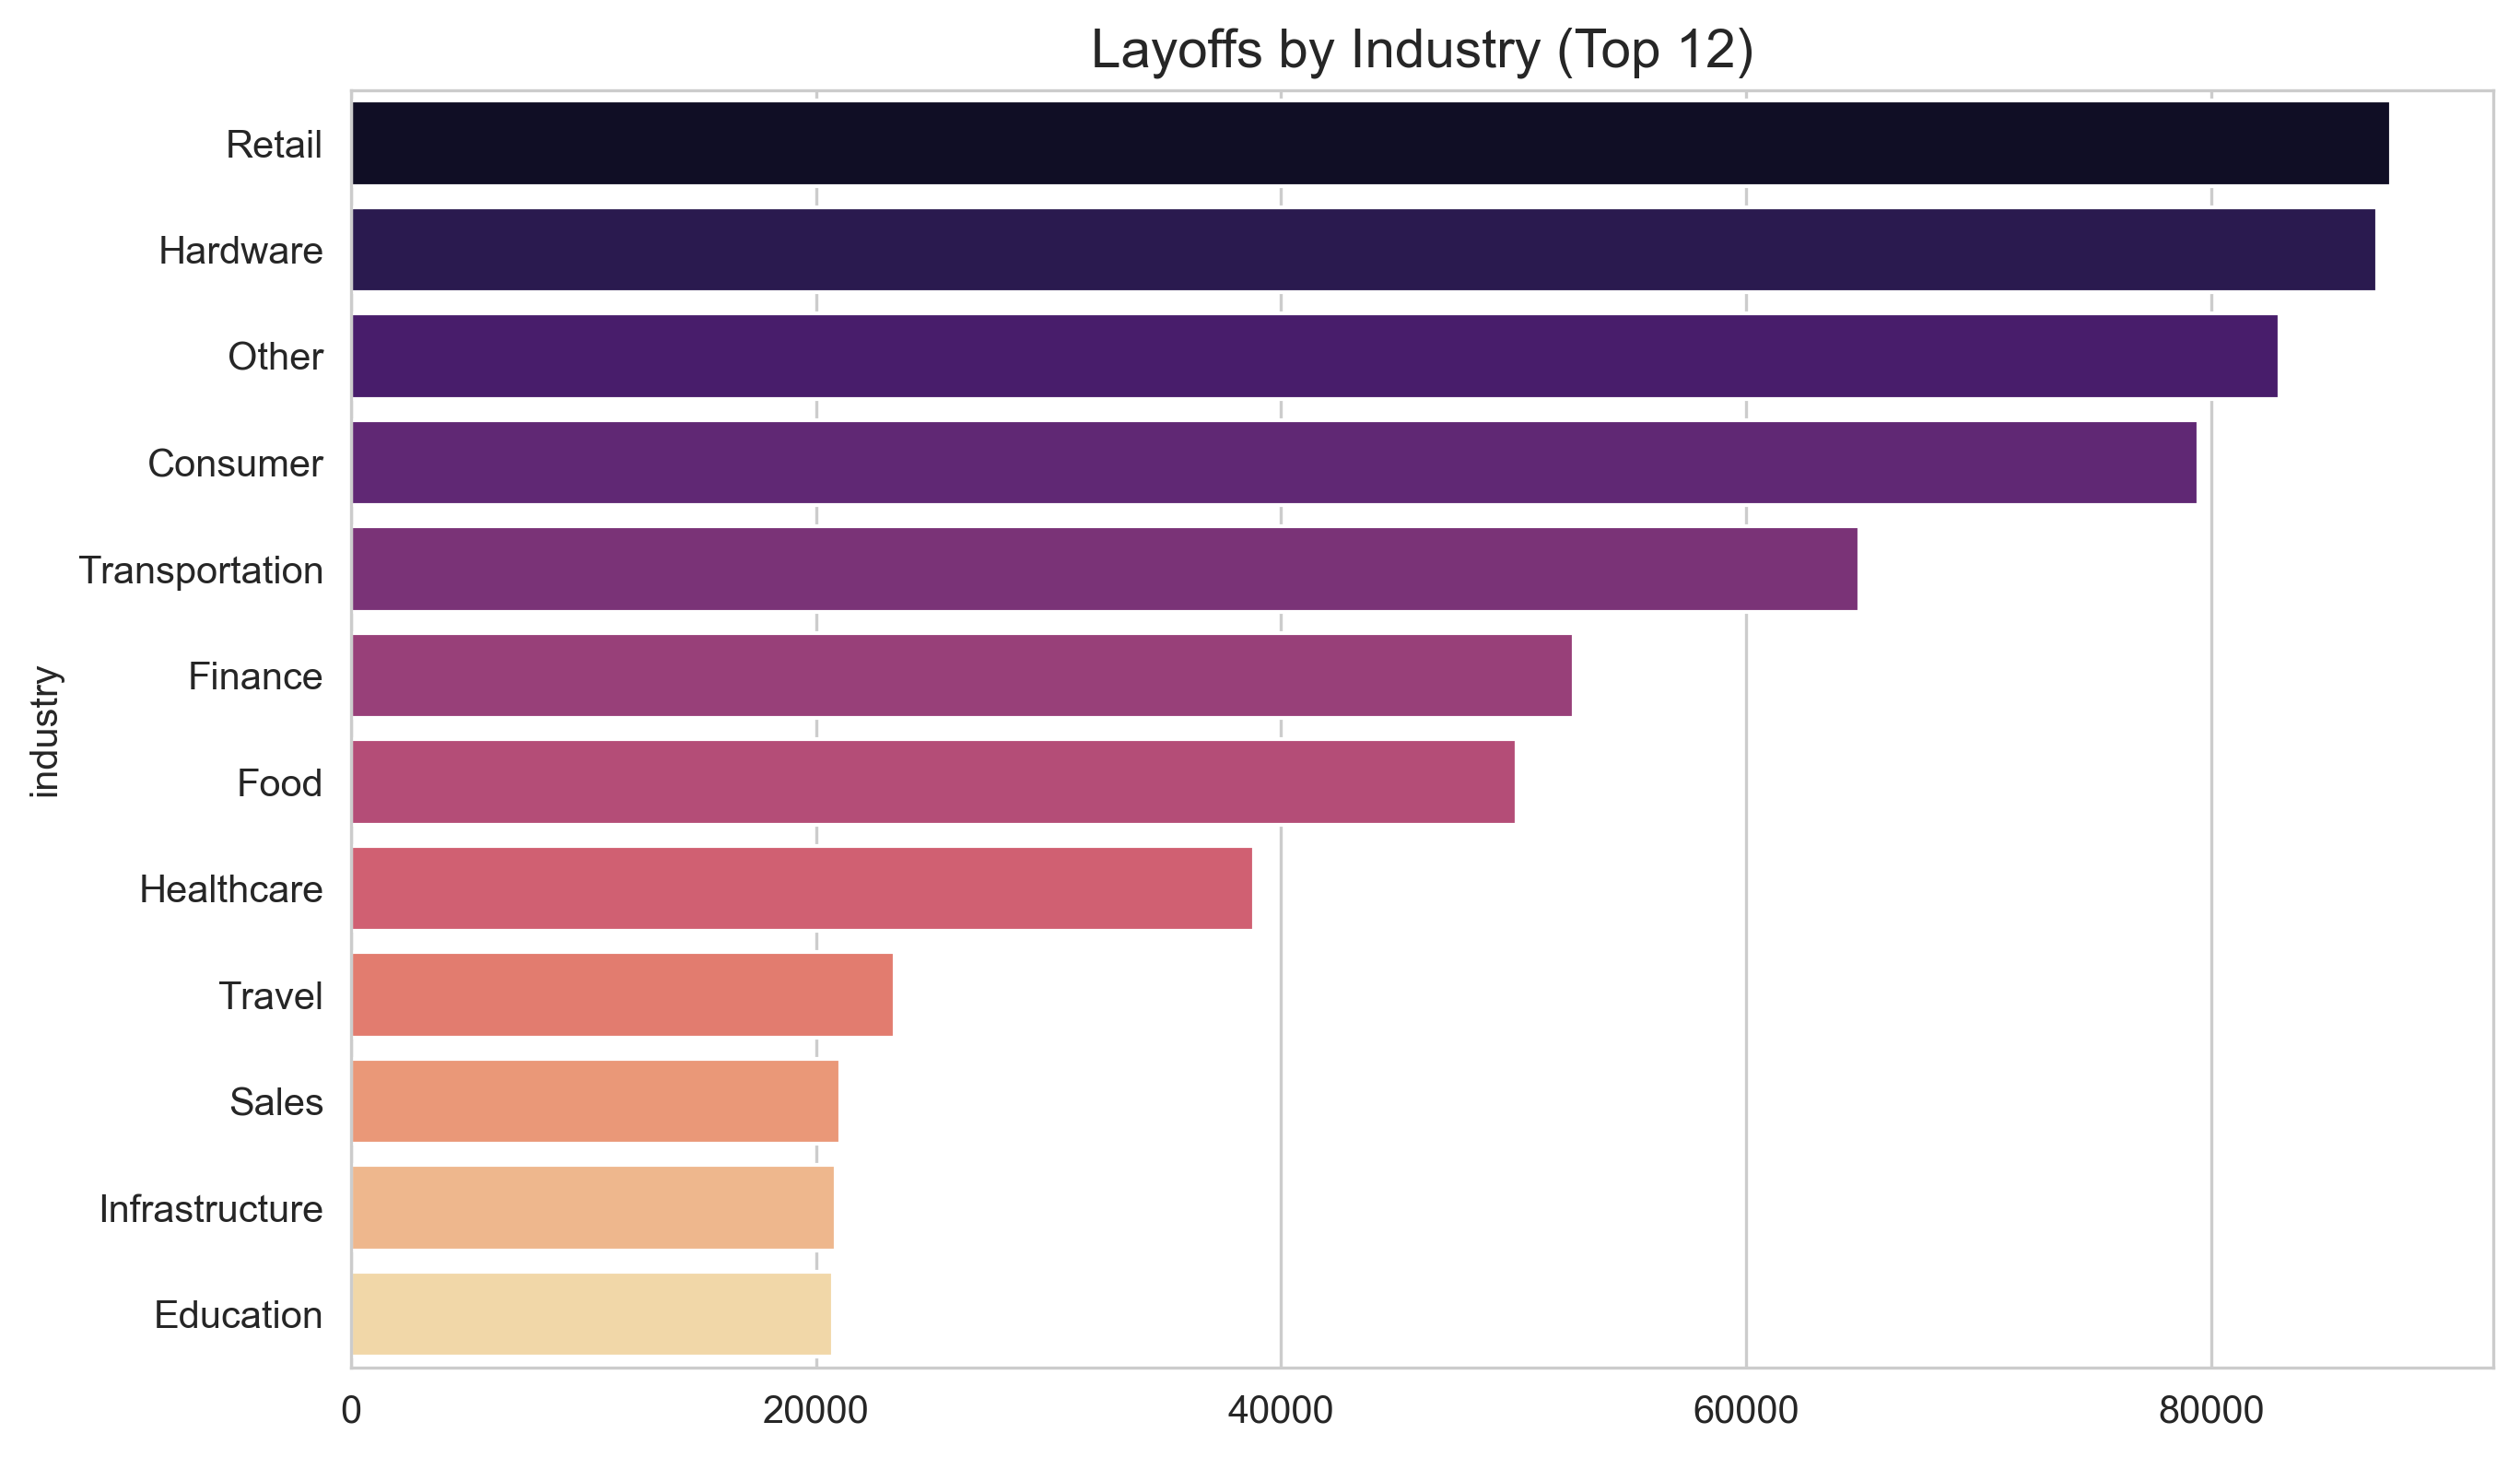

Saved Slide_09_IndustryLayoffs.png


In [6]:

# --- Image 4 (Slide 9): Layoffs by Industry ---
ind_layoffs = layoffs.groupby('industry')['total_laid_off'].sum().sort_values(ascending=False).head(12)
plt.figure()
sns.barplot(y=ind_layoffs.index, x=ind_layoffs.values, palette="magma")
plt.title('Layoffs by Industry (Top 12)', fontsize=14)
plt.show()
save_plot("Slide_09_IndustryLayoffs.png")


/var/folders/40/sdhd020s23j5xmv9v34h73pm0000gn/T/ipykernel_77549/1673671809.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='industry', y='percentage_laid_off', data=perc_data, palette="coolwarm")


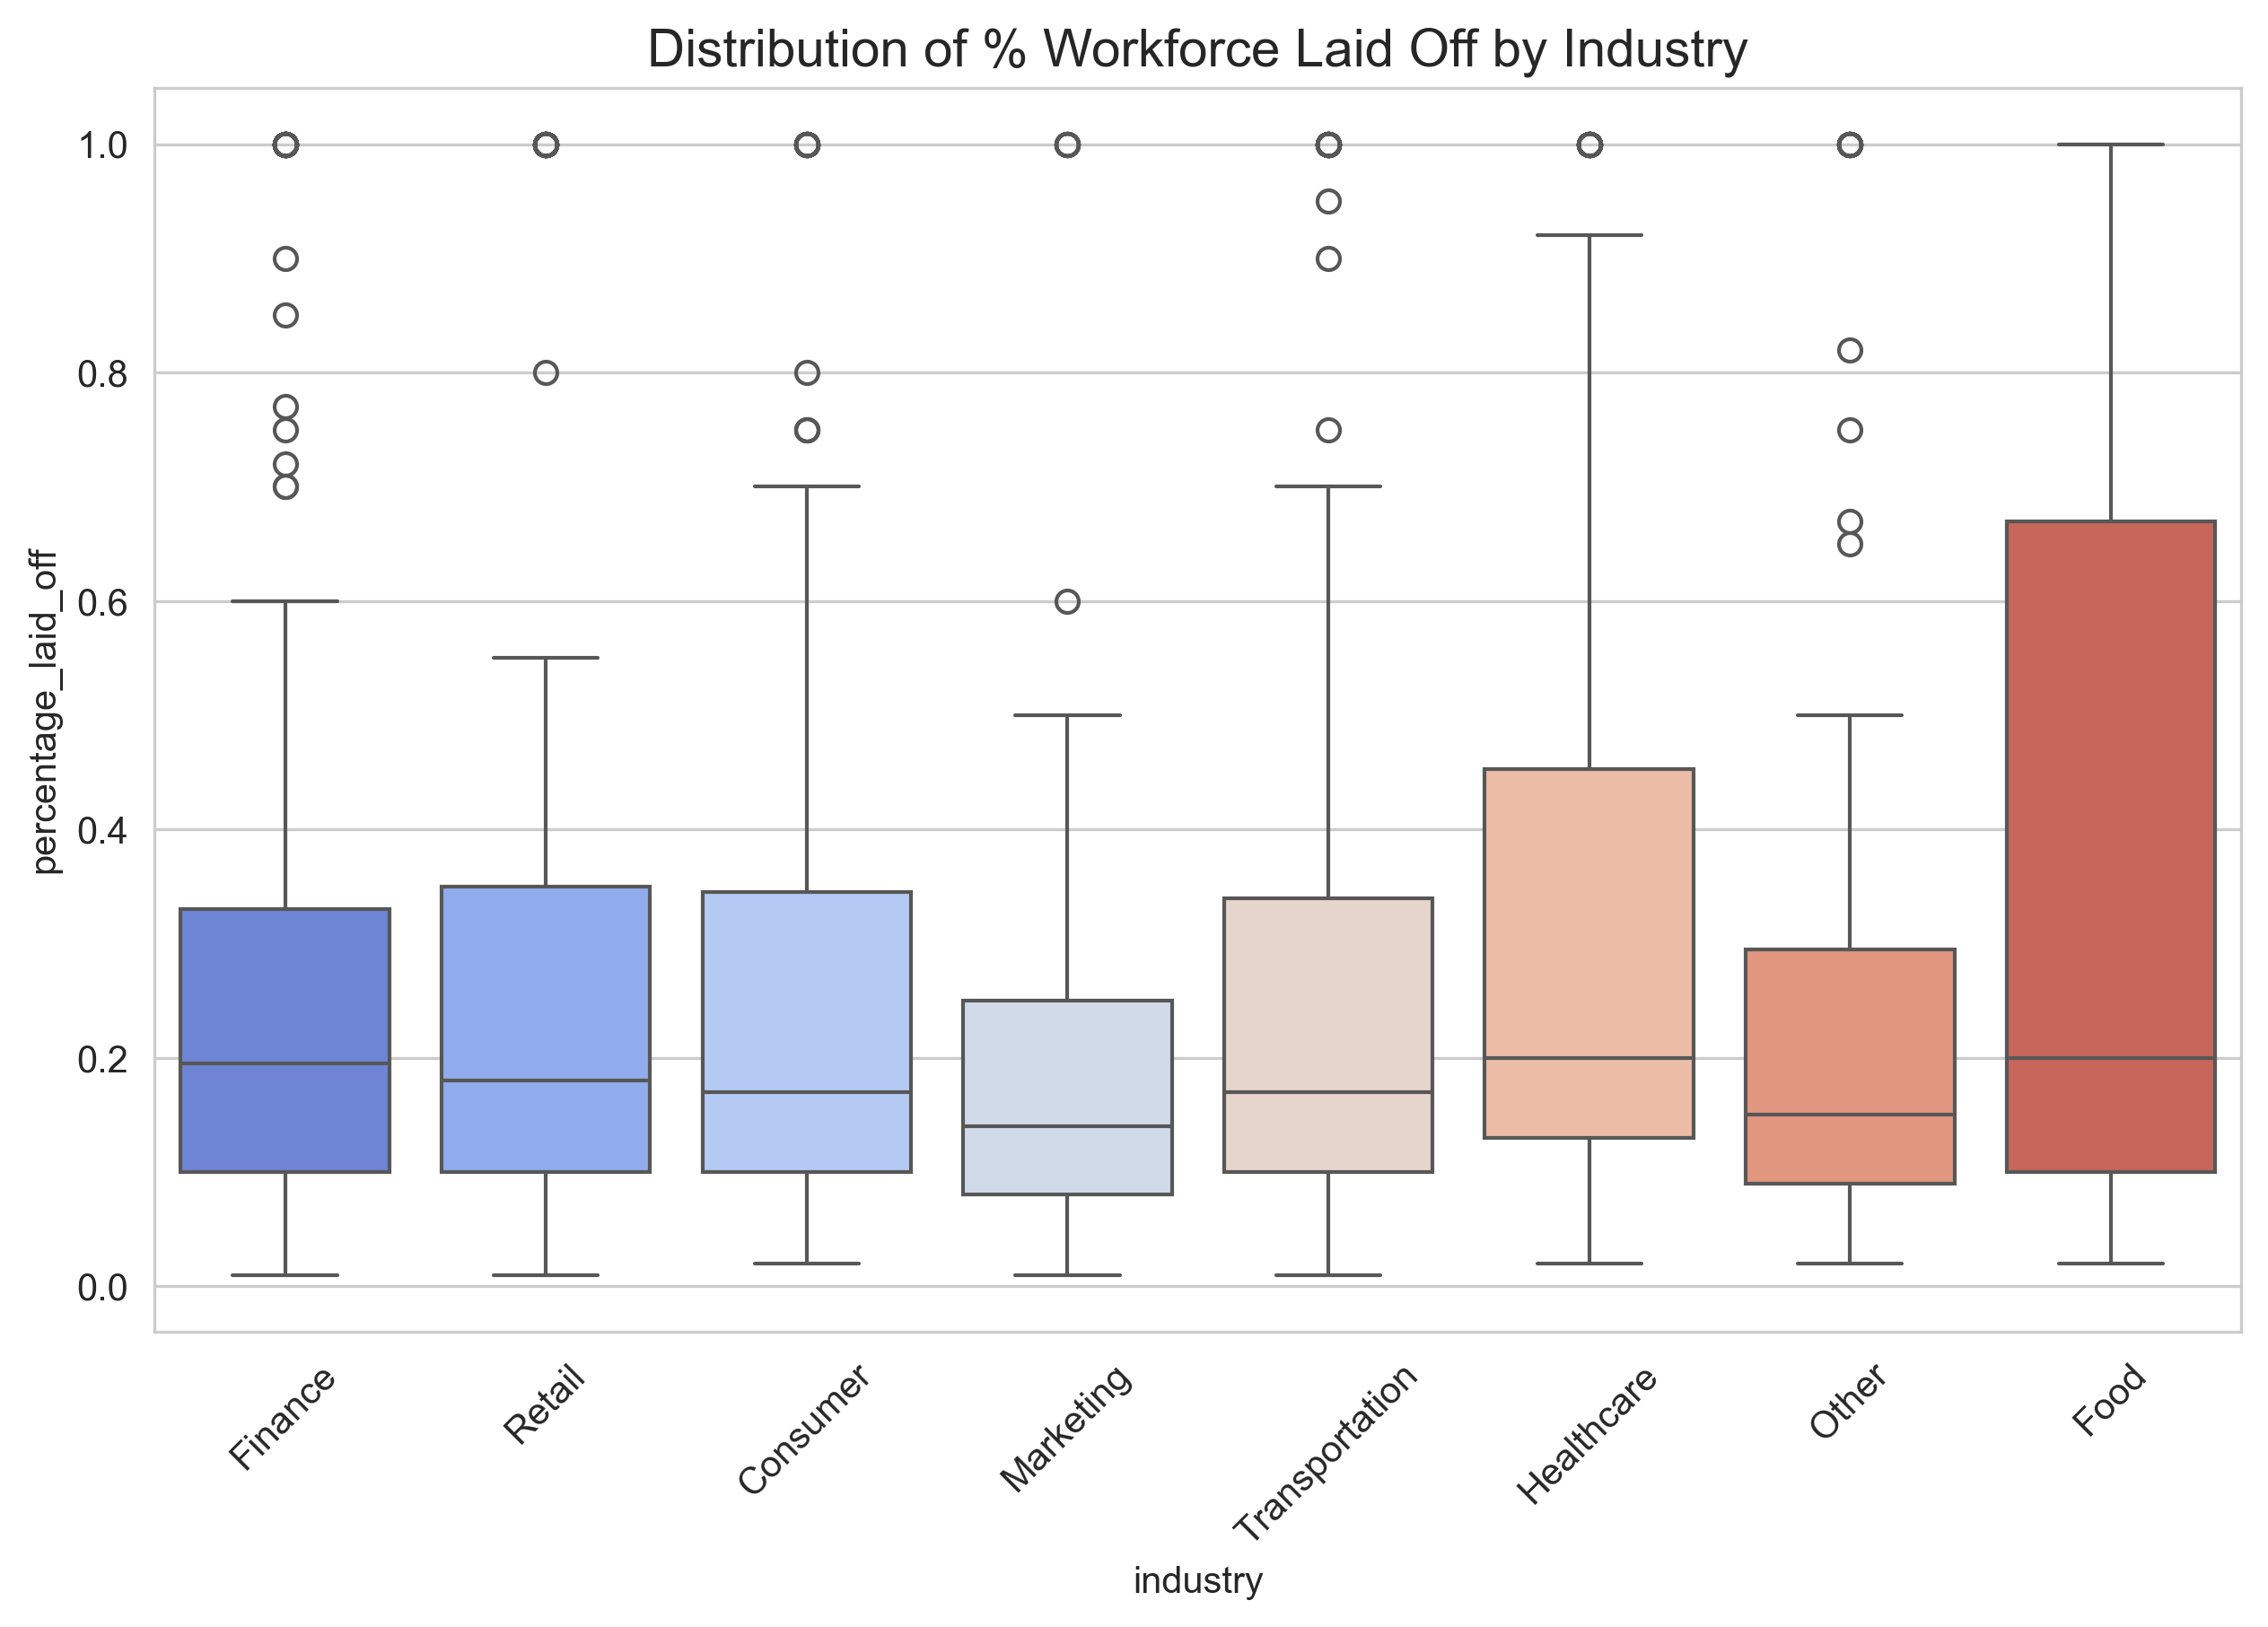

Saved Slide_10_PercBoxplot.png


In [7]:

# --- Image 5 (Slide 10): % Laid Off Boxplot ---
top_inds = layoffs['industry'].value_counts().head(8).index
perc_data = layoffs[layoffs['industry'].isin(top_inds)]
plt.figure()
sns.boxplot(x='industry', y='percentage_laid_off', data=perc_data, palette="coolwarm")
plt.title('Distribution of % Workforce Laid Off by Industry', fontsize=14)
plt.xticks(rotation=45)
plt.show()
save_plot("Slide_10_PercBoxplot.png")


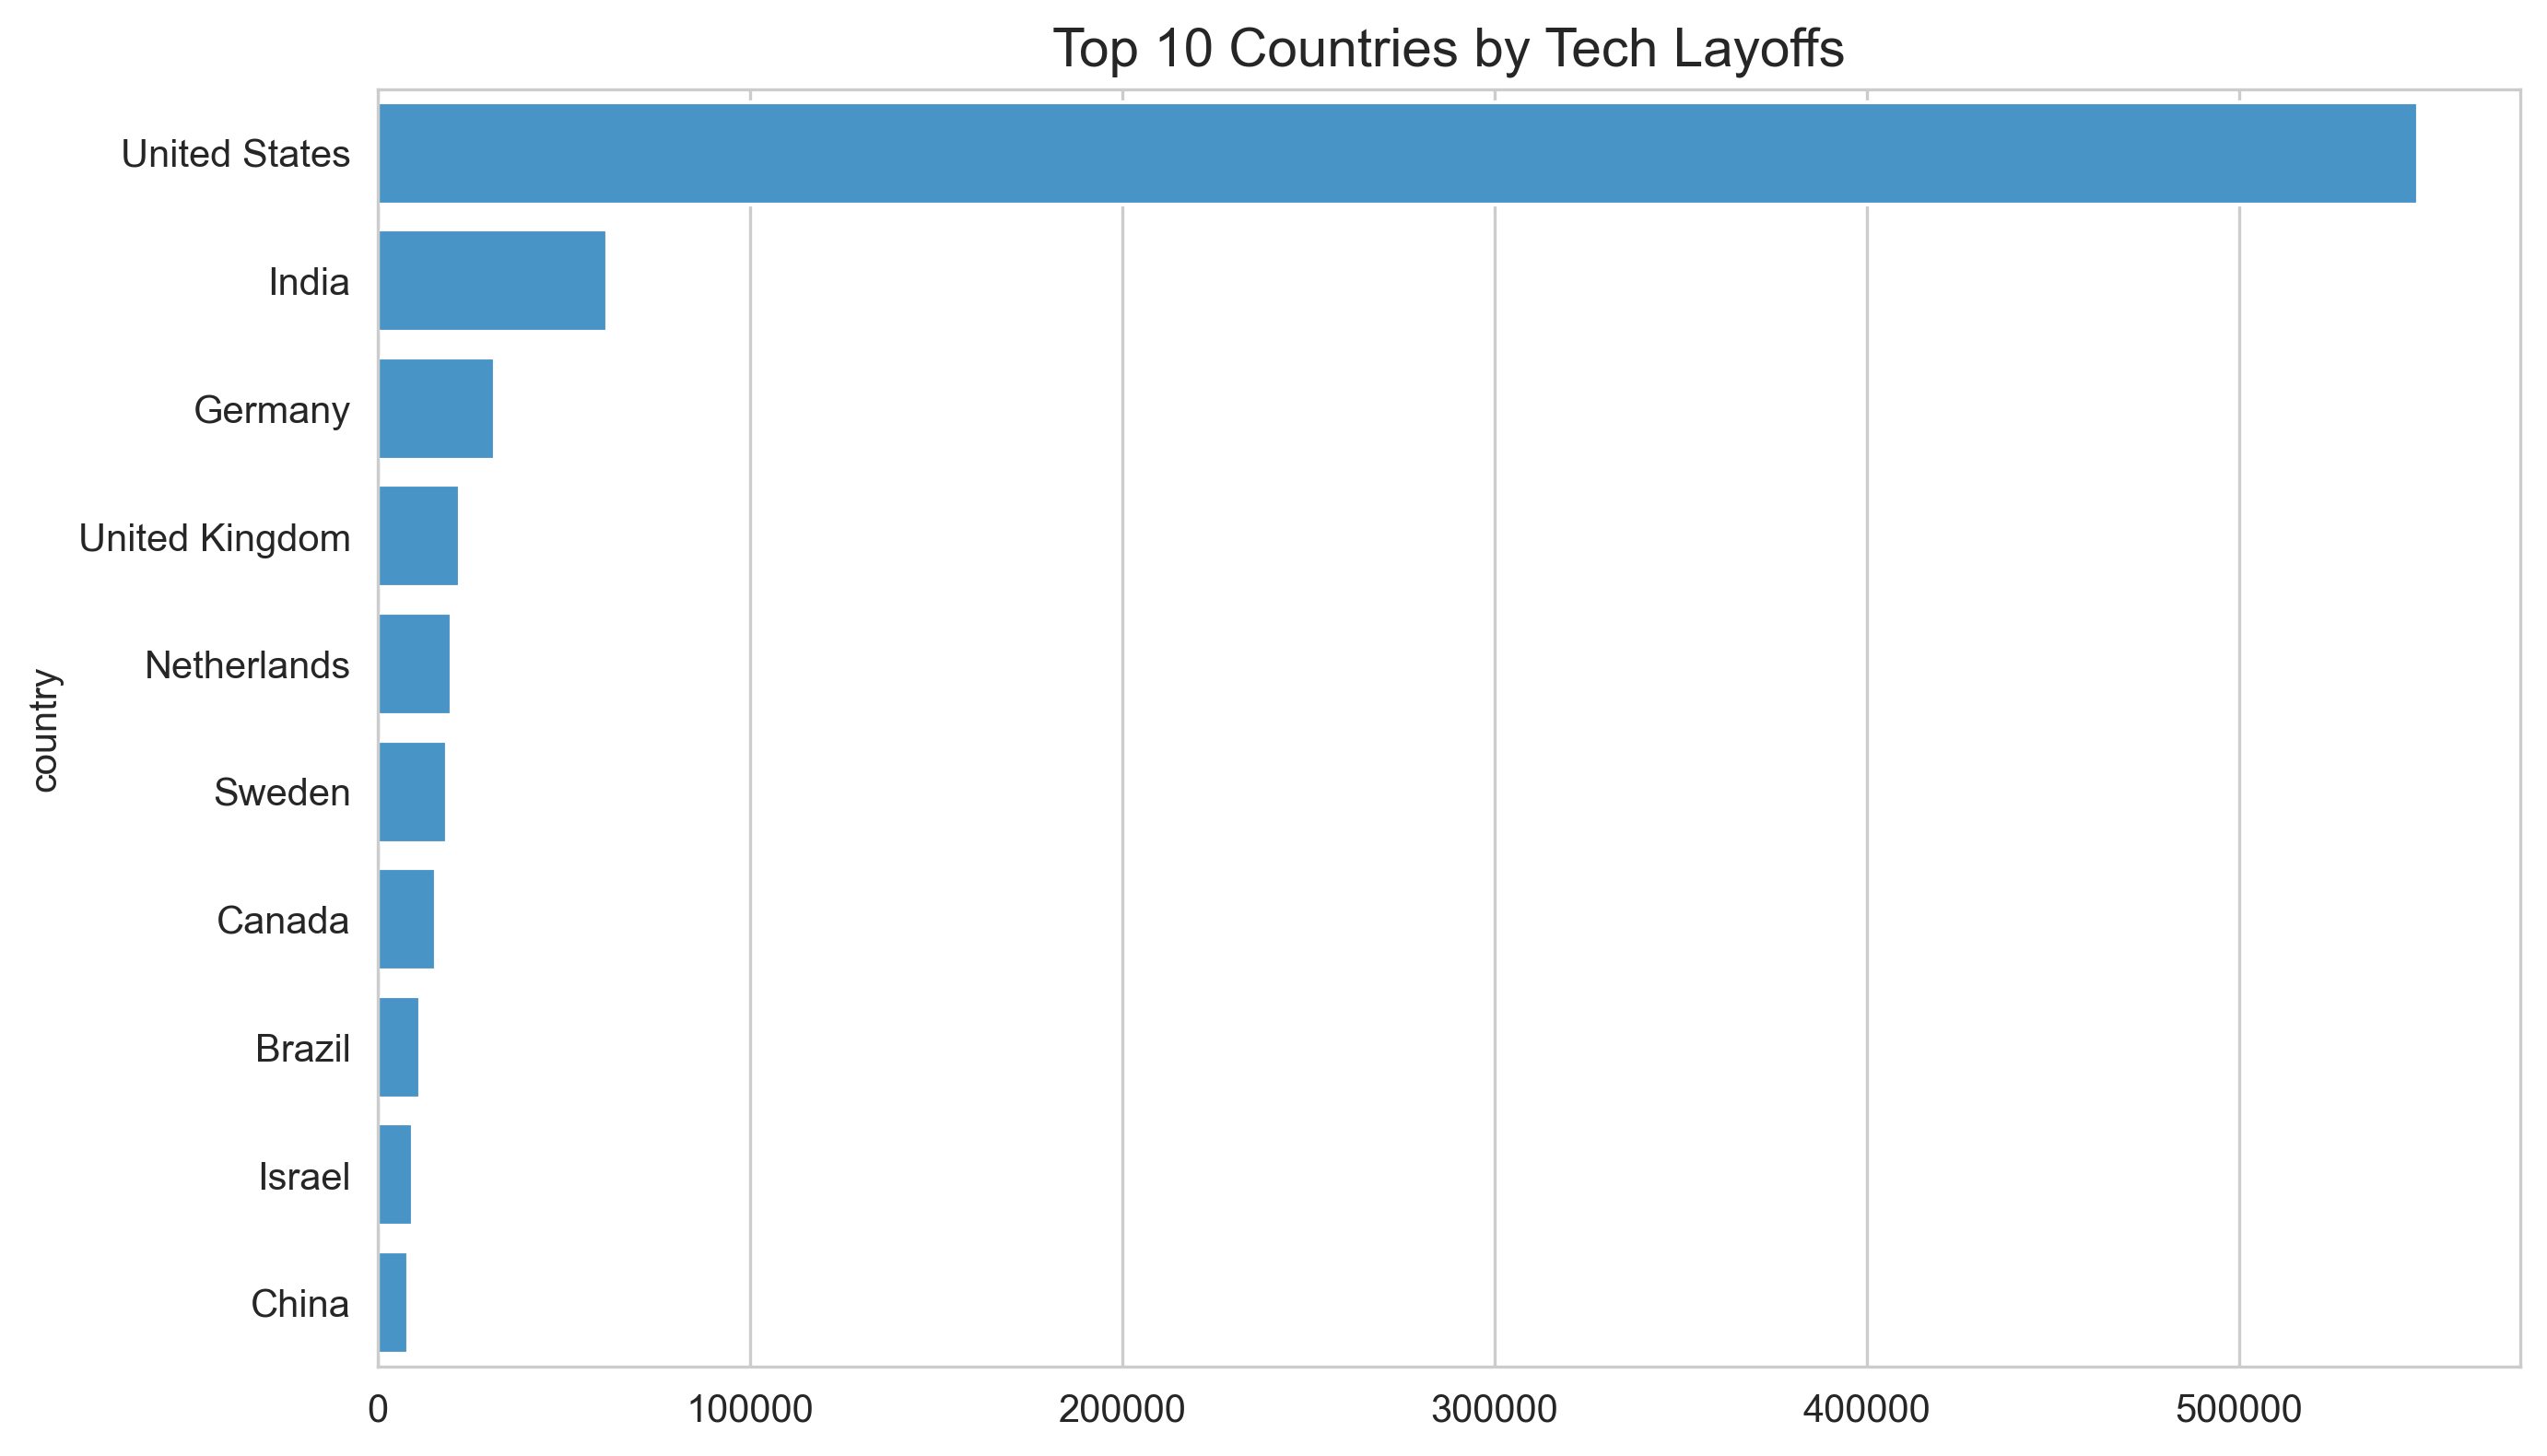

Saved Slide_11_CountryLayoffs.png


In [8]:

# --- Image 6 (Slide 11): Layoffs by Country ---
country_layoffs = layoffs.groupby('country')['total_laid_off'].sum().sort_values(ascending=False).head(10)
plt.figure()
sns.barplot(y=country_layoffs.index, x=country_layoffs.values, color="#3498db")
plt.title('Top 10 Countries by Tech Layoffs', fontsize=14)
plt.show()
save_plot("Slide_11_CountryLayoffs.png")


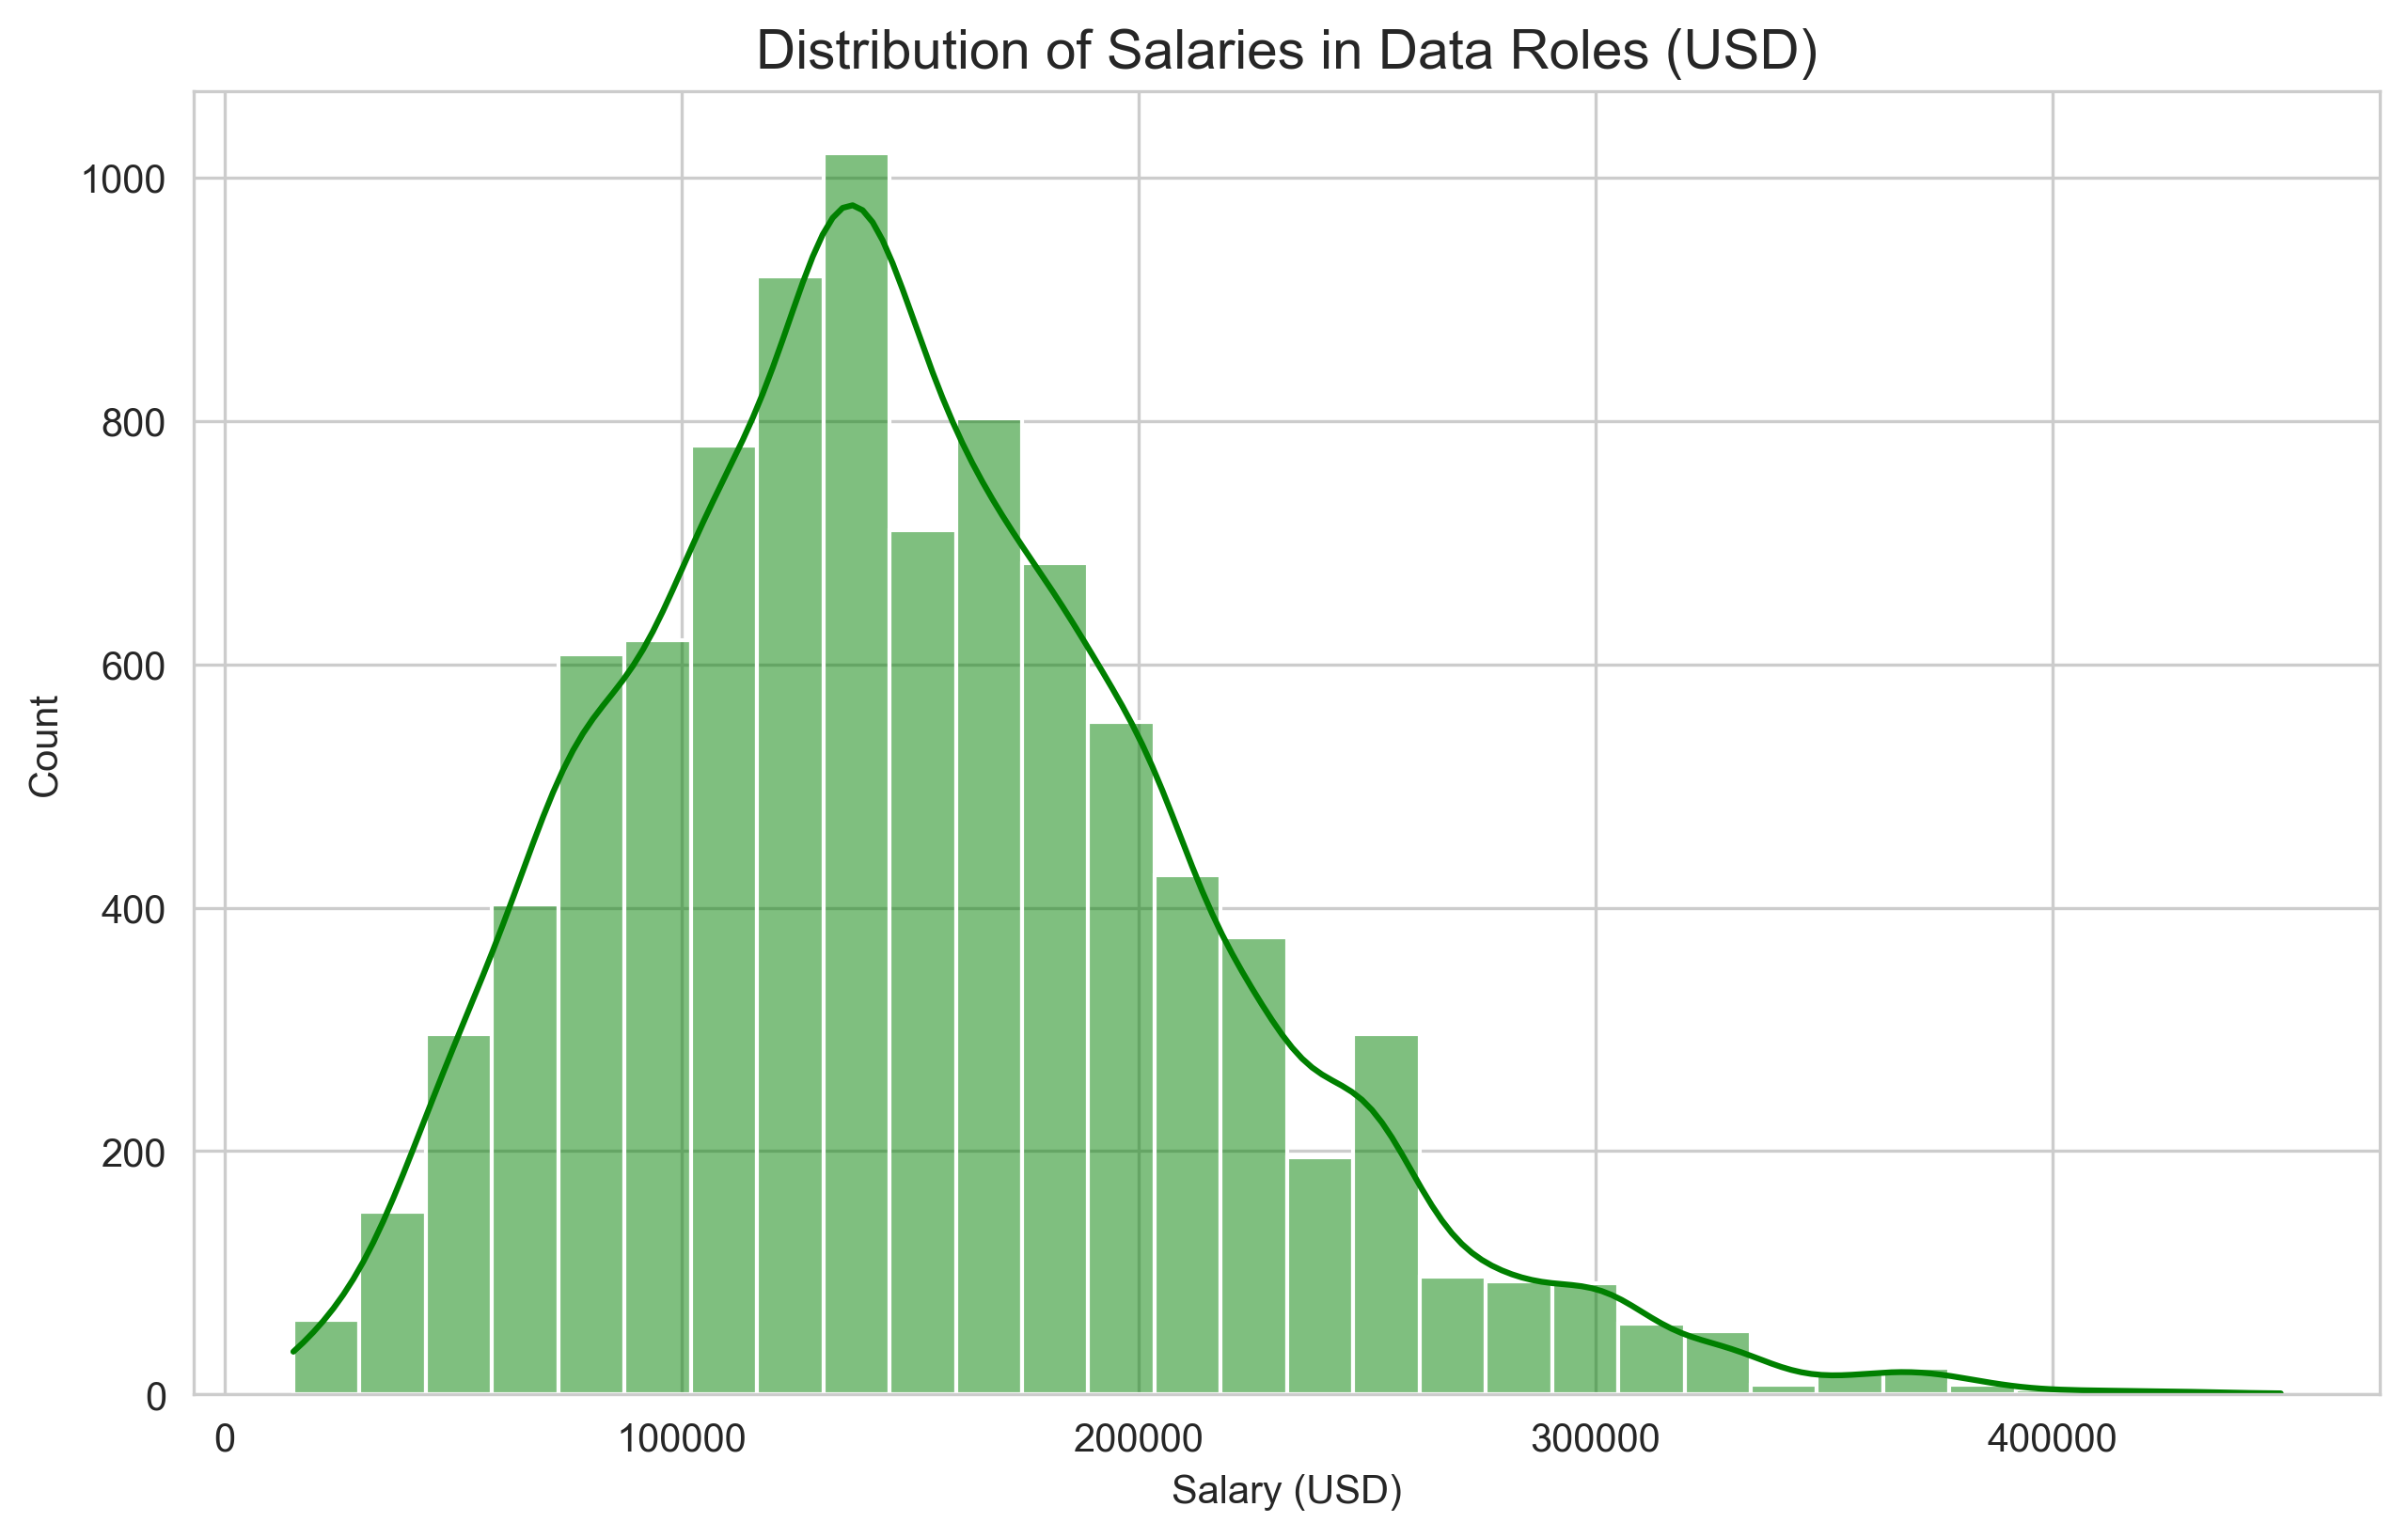

Saved Slide_12_SalaryHist.png


In [9]:

# --- Image 9 (Slide 12): Salary Histogram ---
plt.figure()
sns.histplot(jobs['salary_in_usd'], bins=30, kde=True, color="green")
plt.title('Distribution of Salaries in Data Roles (USD)', fontsize=14)
plt.xlabel('Salary (USD)')
plt.show()
save_plot("Slide_12_SalaryHist.png")


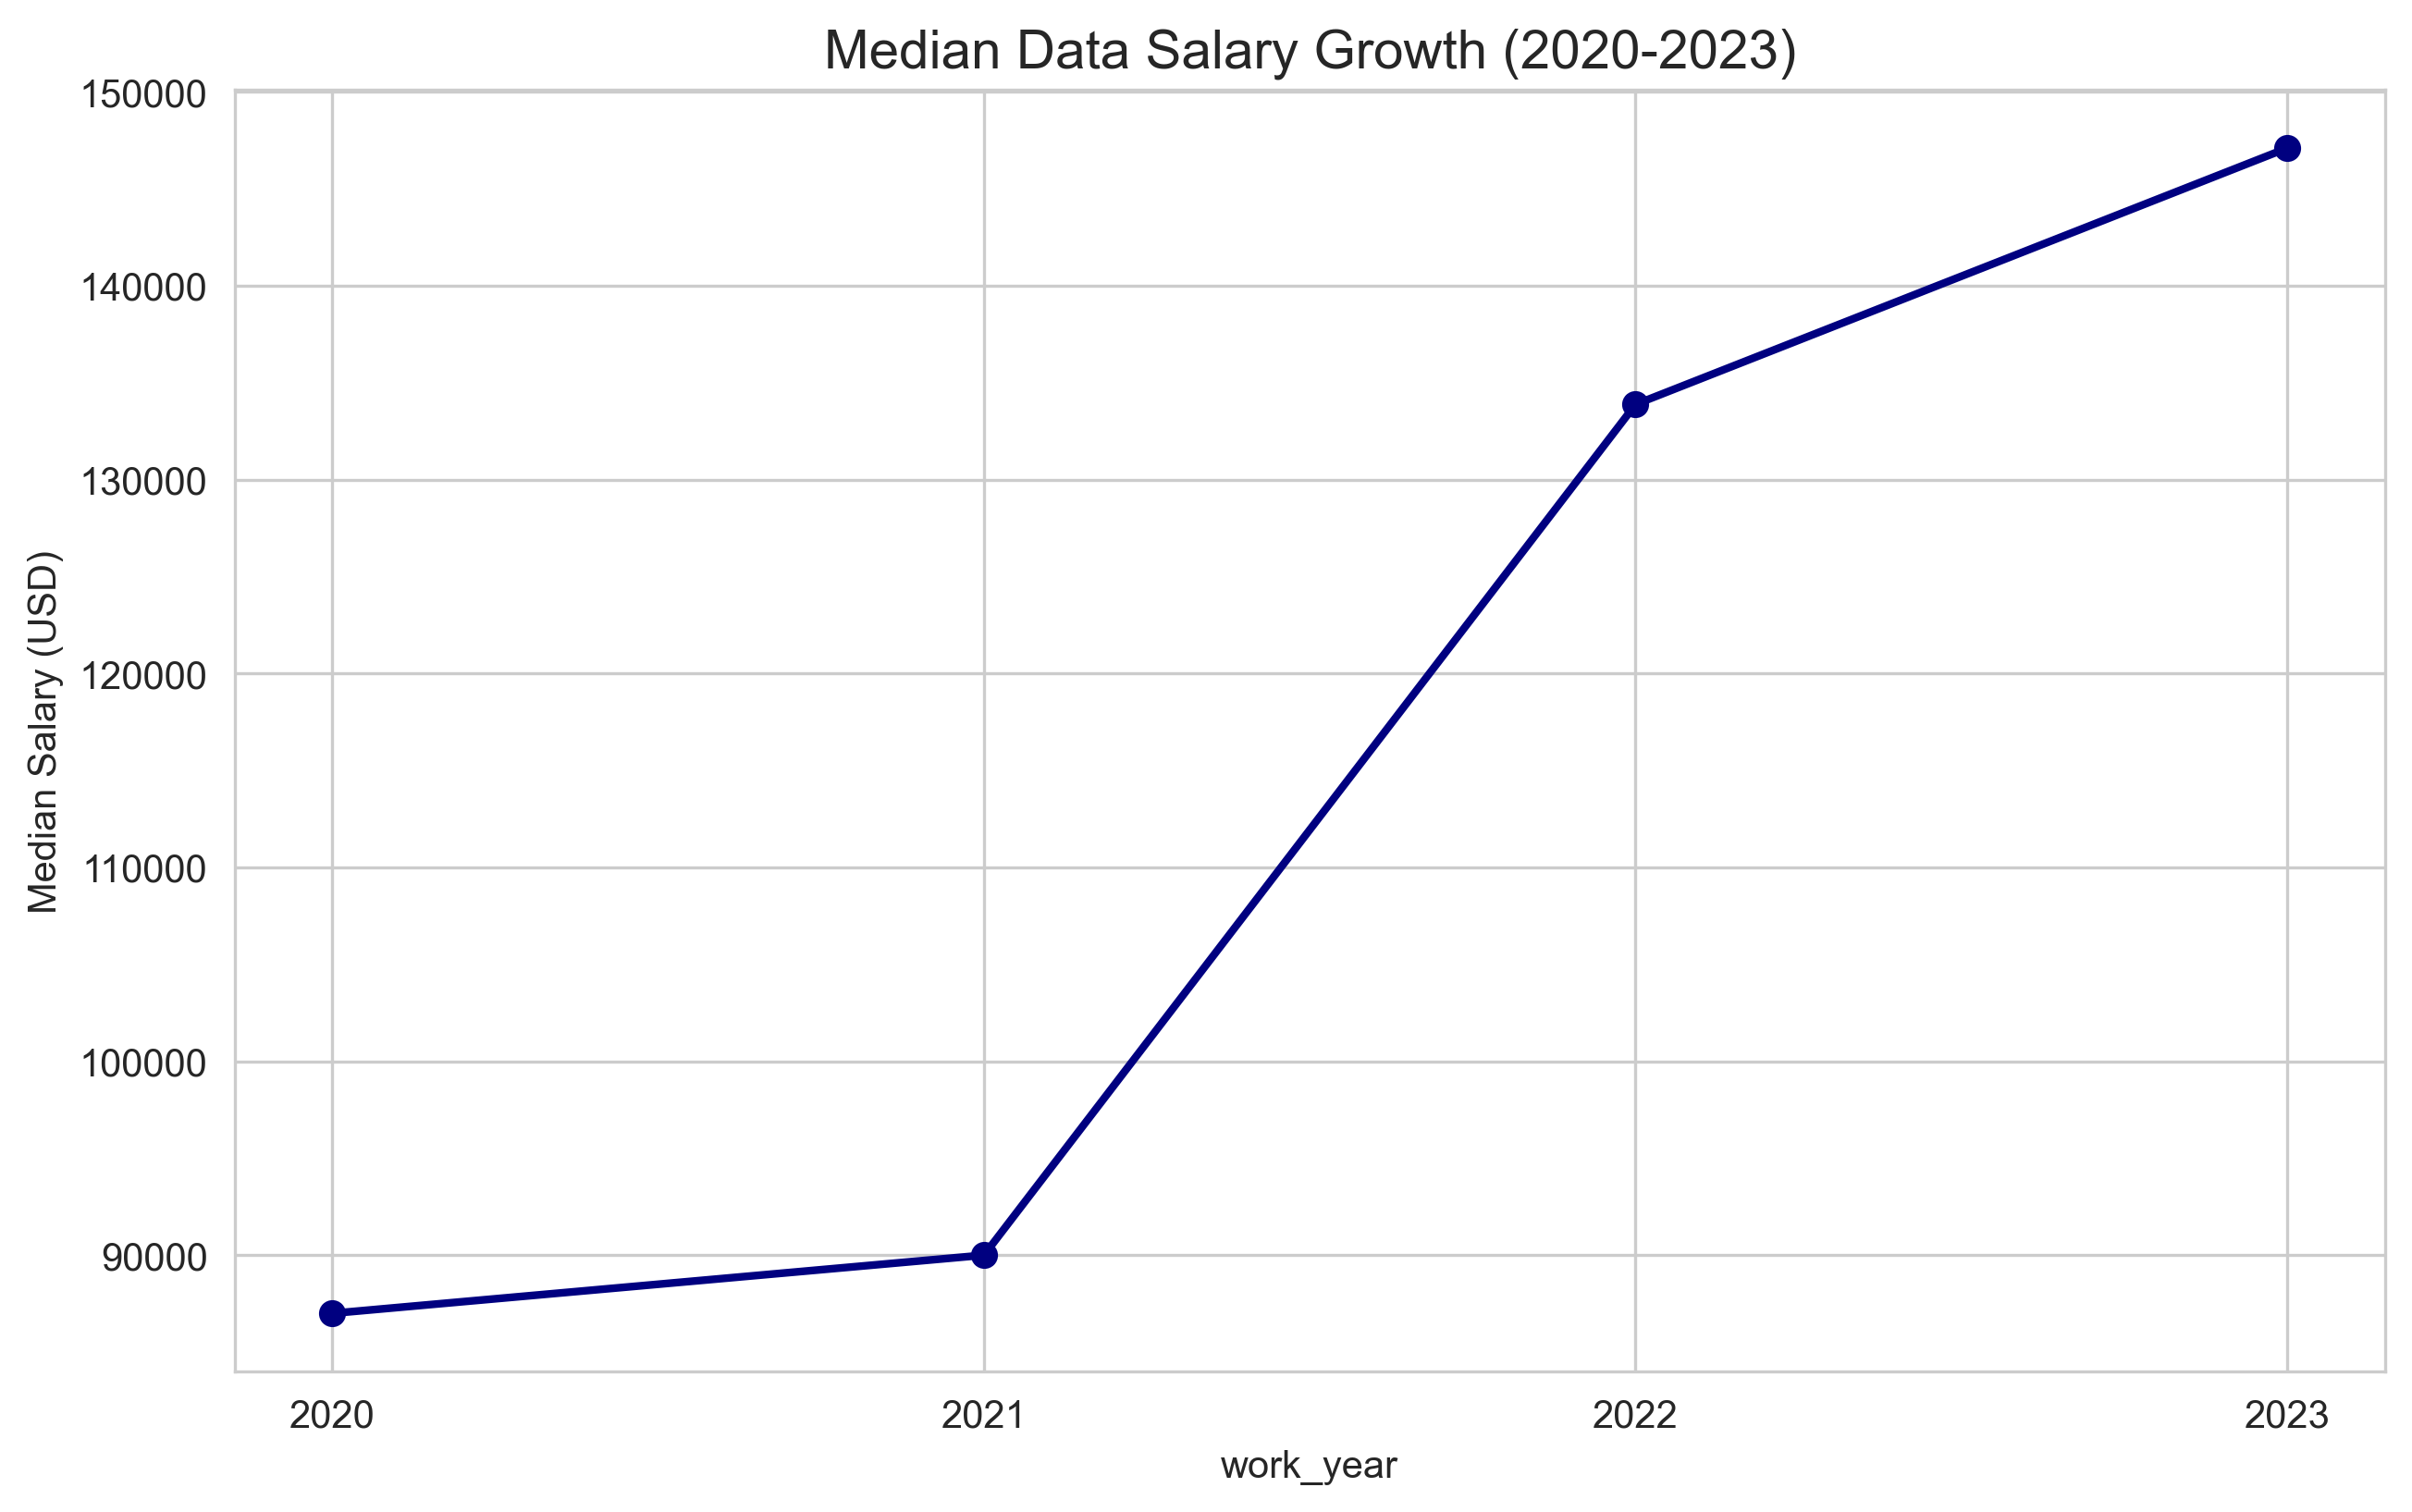

Saved Slide_13_SalaryTrend.png


In [10]:

# --- Image 10 (Slide 13): Median Salary by Year ---
salary_year = jobs.groupby('work_year')['salary_in_usd'].median()
plt.figure()
salary_year.plot(kind='line', marker='o', linestyle='-', color='navy', linewidth=2)
plt.title('Median Data Salary Growth (2020-2023)', fontsize=14)
plt.xticks(list(salary_year.index)) # Ensure integers for years
plt.ylabel('Median Salary (USD)')
plt.show()
save_plot("Slide_13_SalaryTrend.png")


/var/folders/40/sdhd020s23j5xmv9v34h73pm0000gn/T/ipykernel_77549/2311668016.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='experience_level', y='salary_in_usd', data=jobs, order=exp_order, palette="Set2")


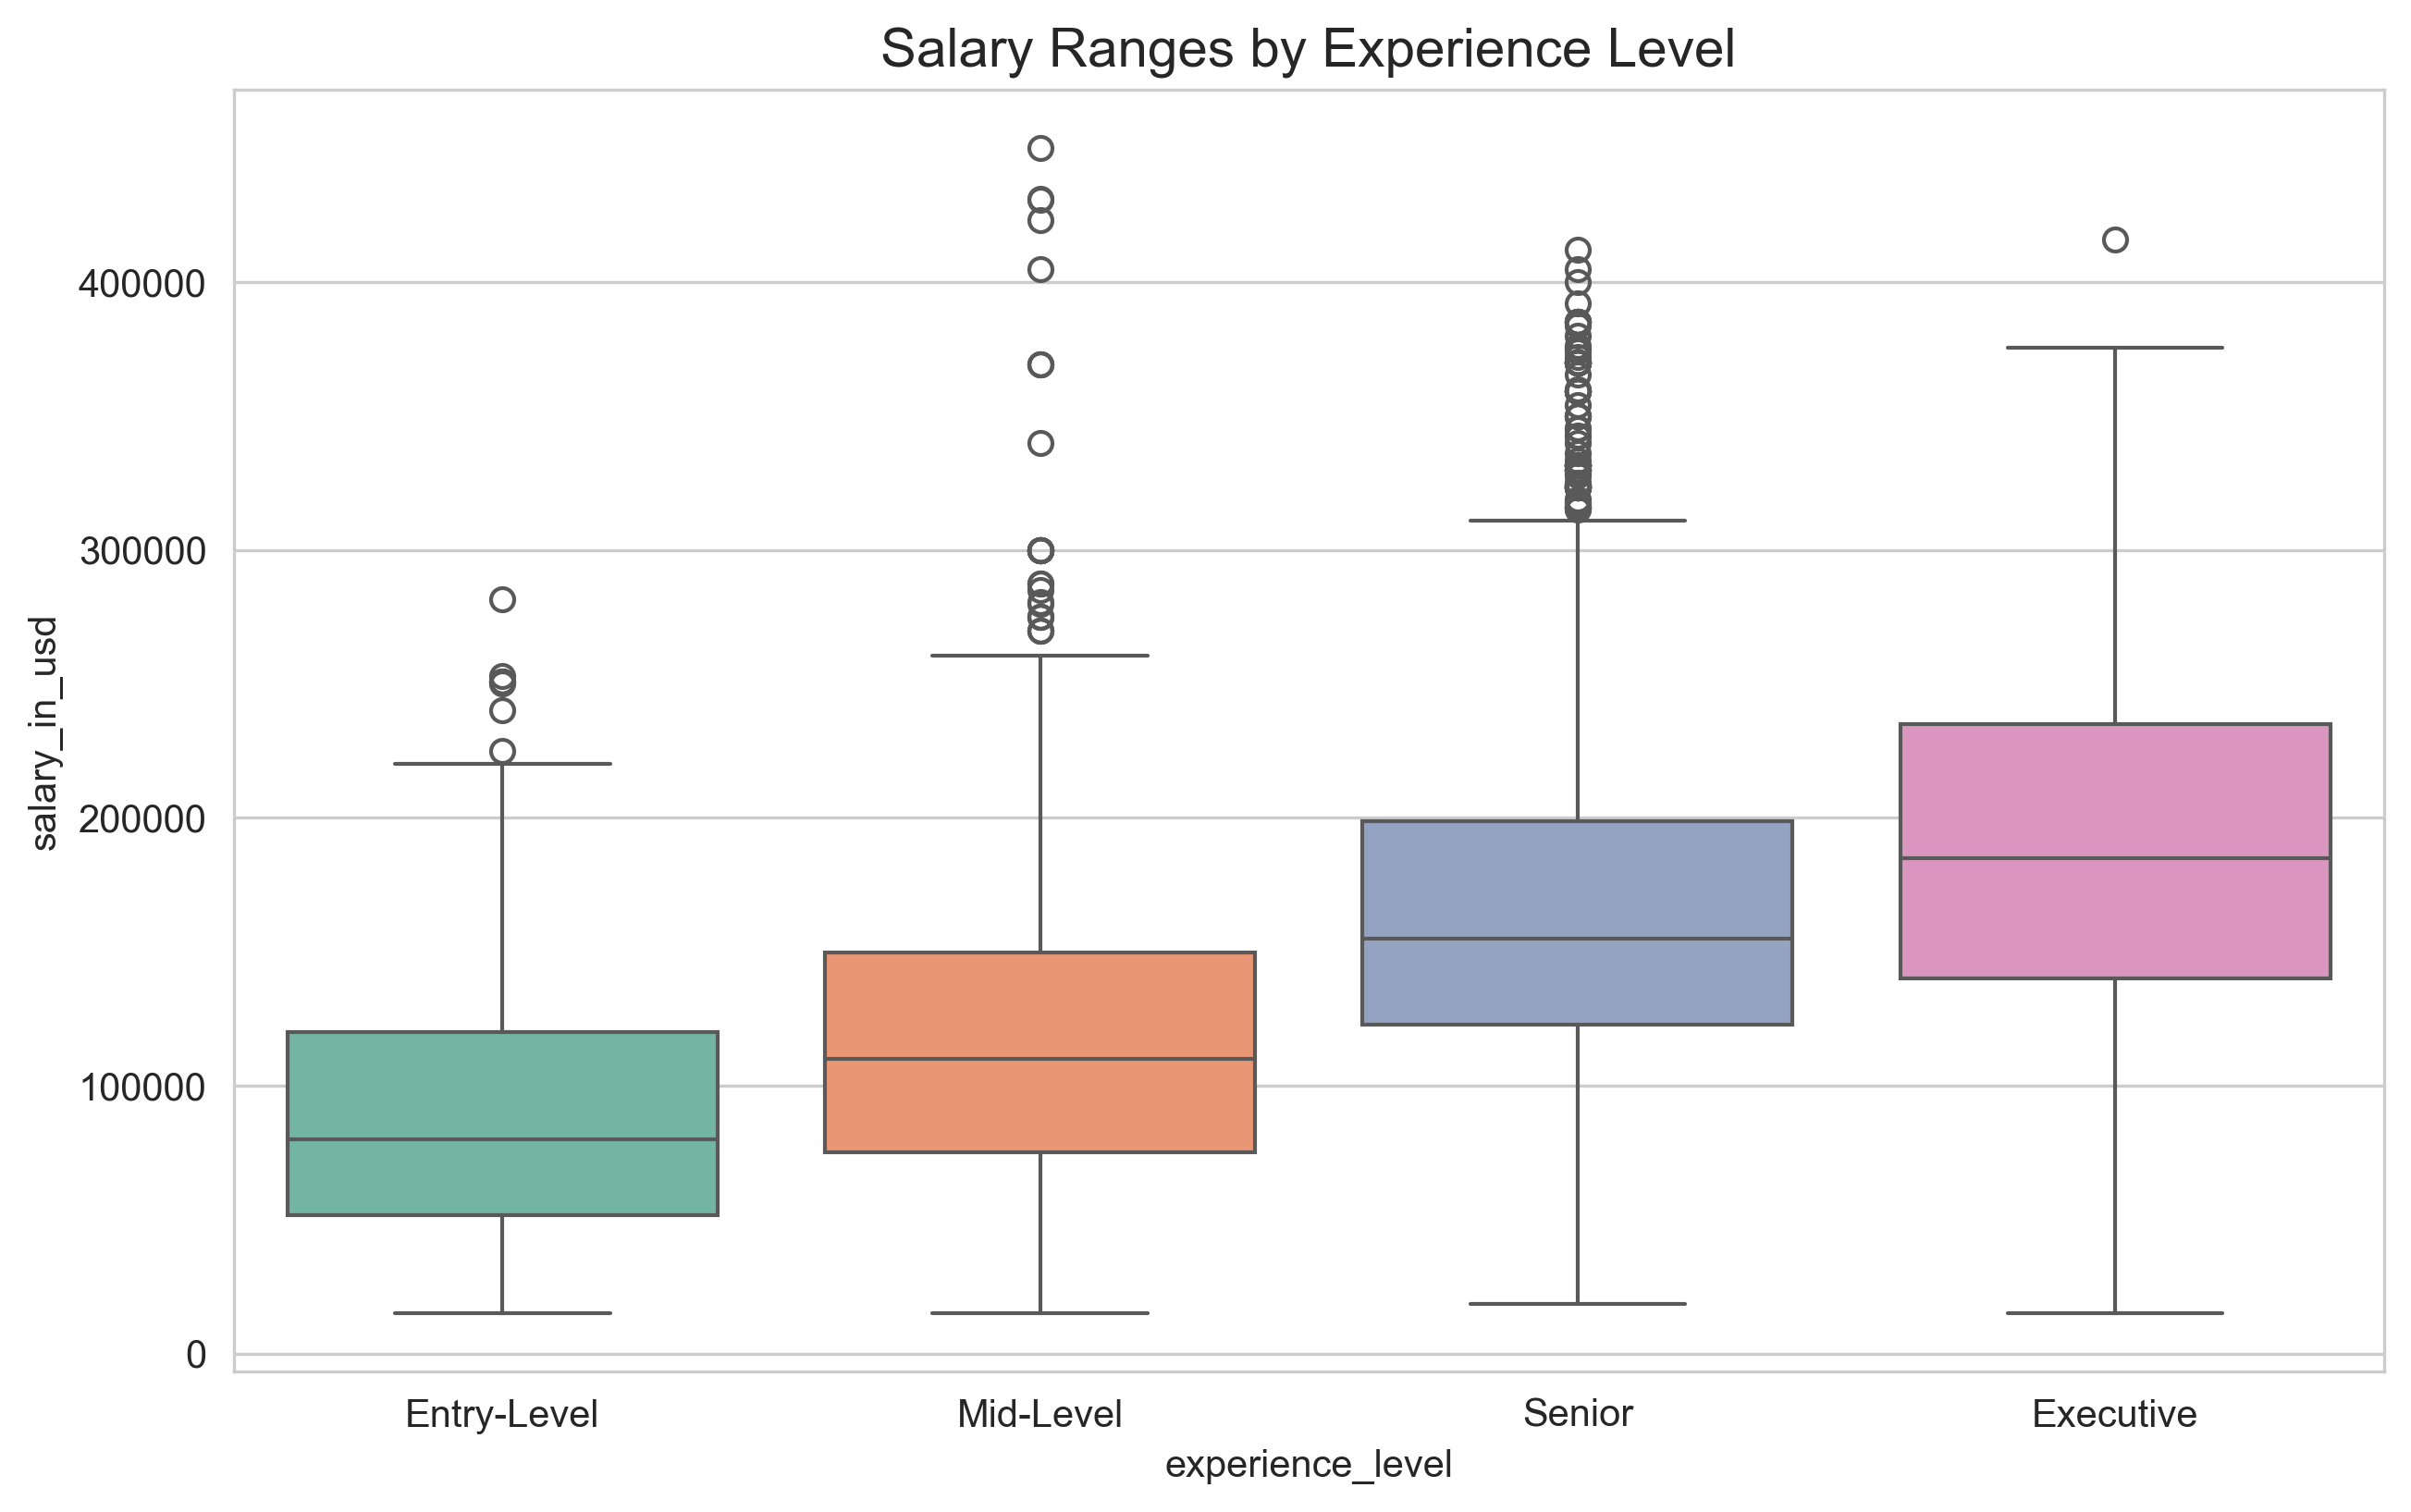

Saved Slide_14_ExpSalary.png


In [11]:

# --- Image 11 (Slide 14): Salary by Experience Boxplot ---
plt.figure()
sns.boxplot(x='experience_level', y='salary_in_usd', data=jobs, order=exp_order, palette="Set2")
plt.title('Salary Ranges by Experience Level', fontsize=14)
plt.show()
save_plot("Slide_14_ExpSalary.png")


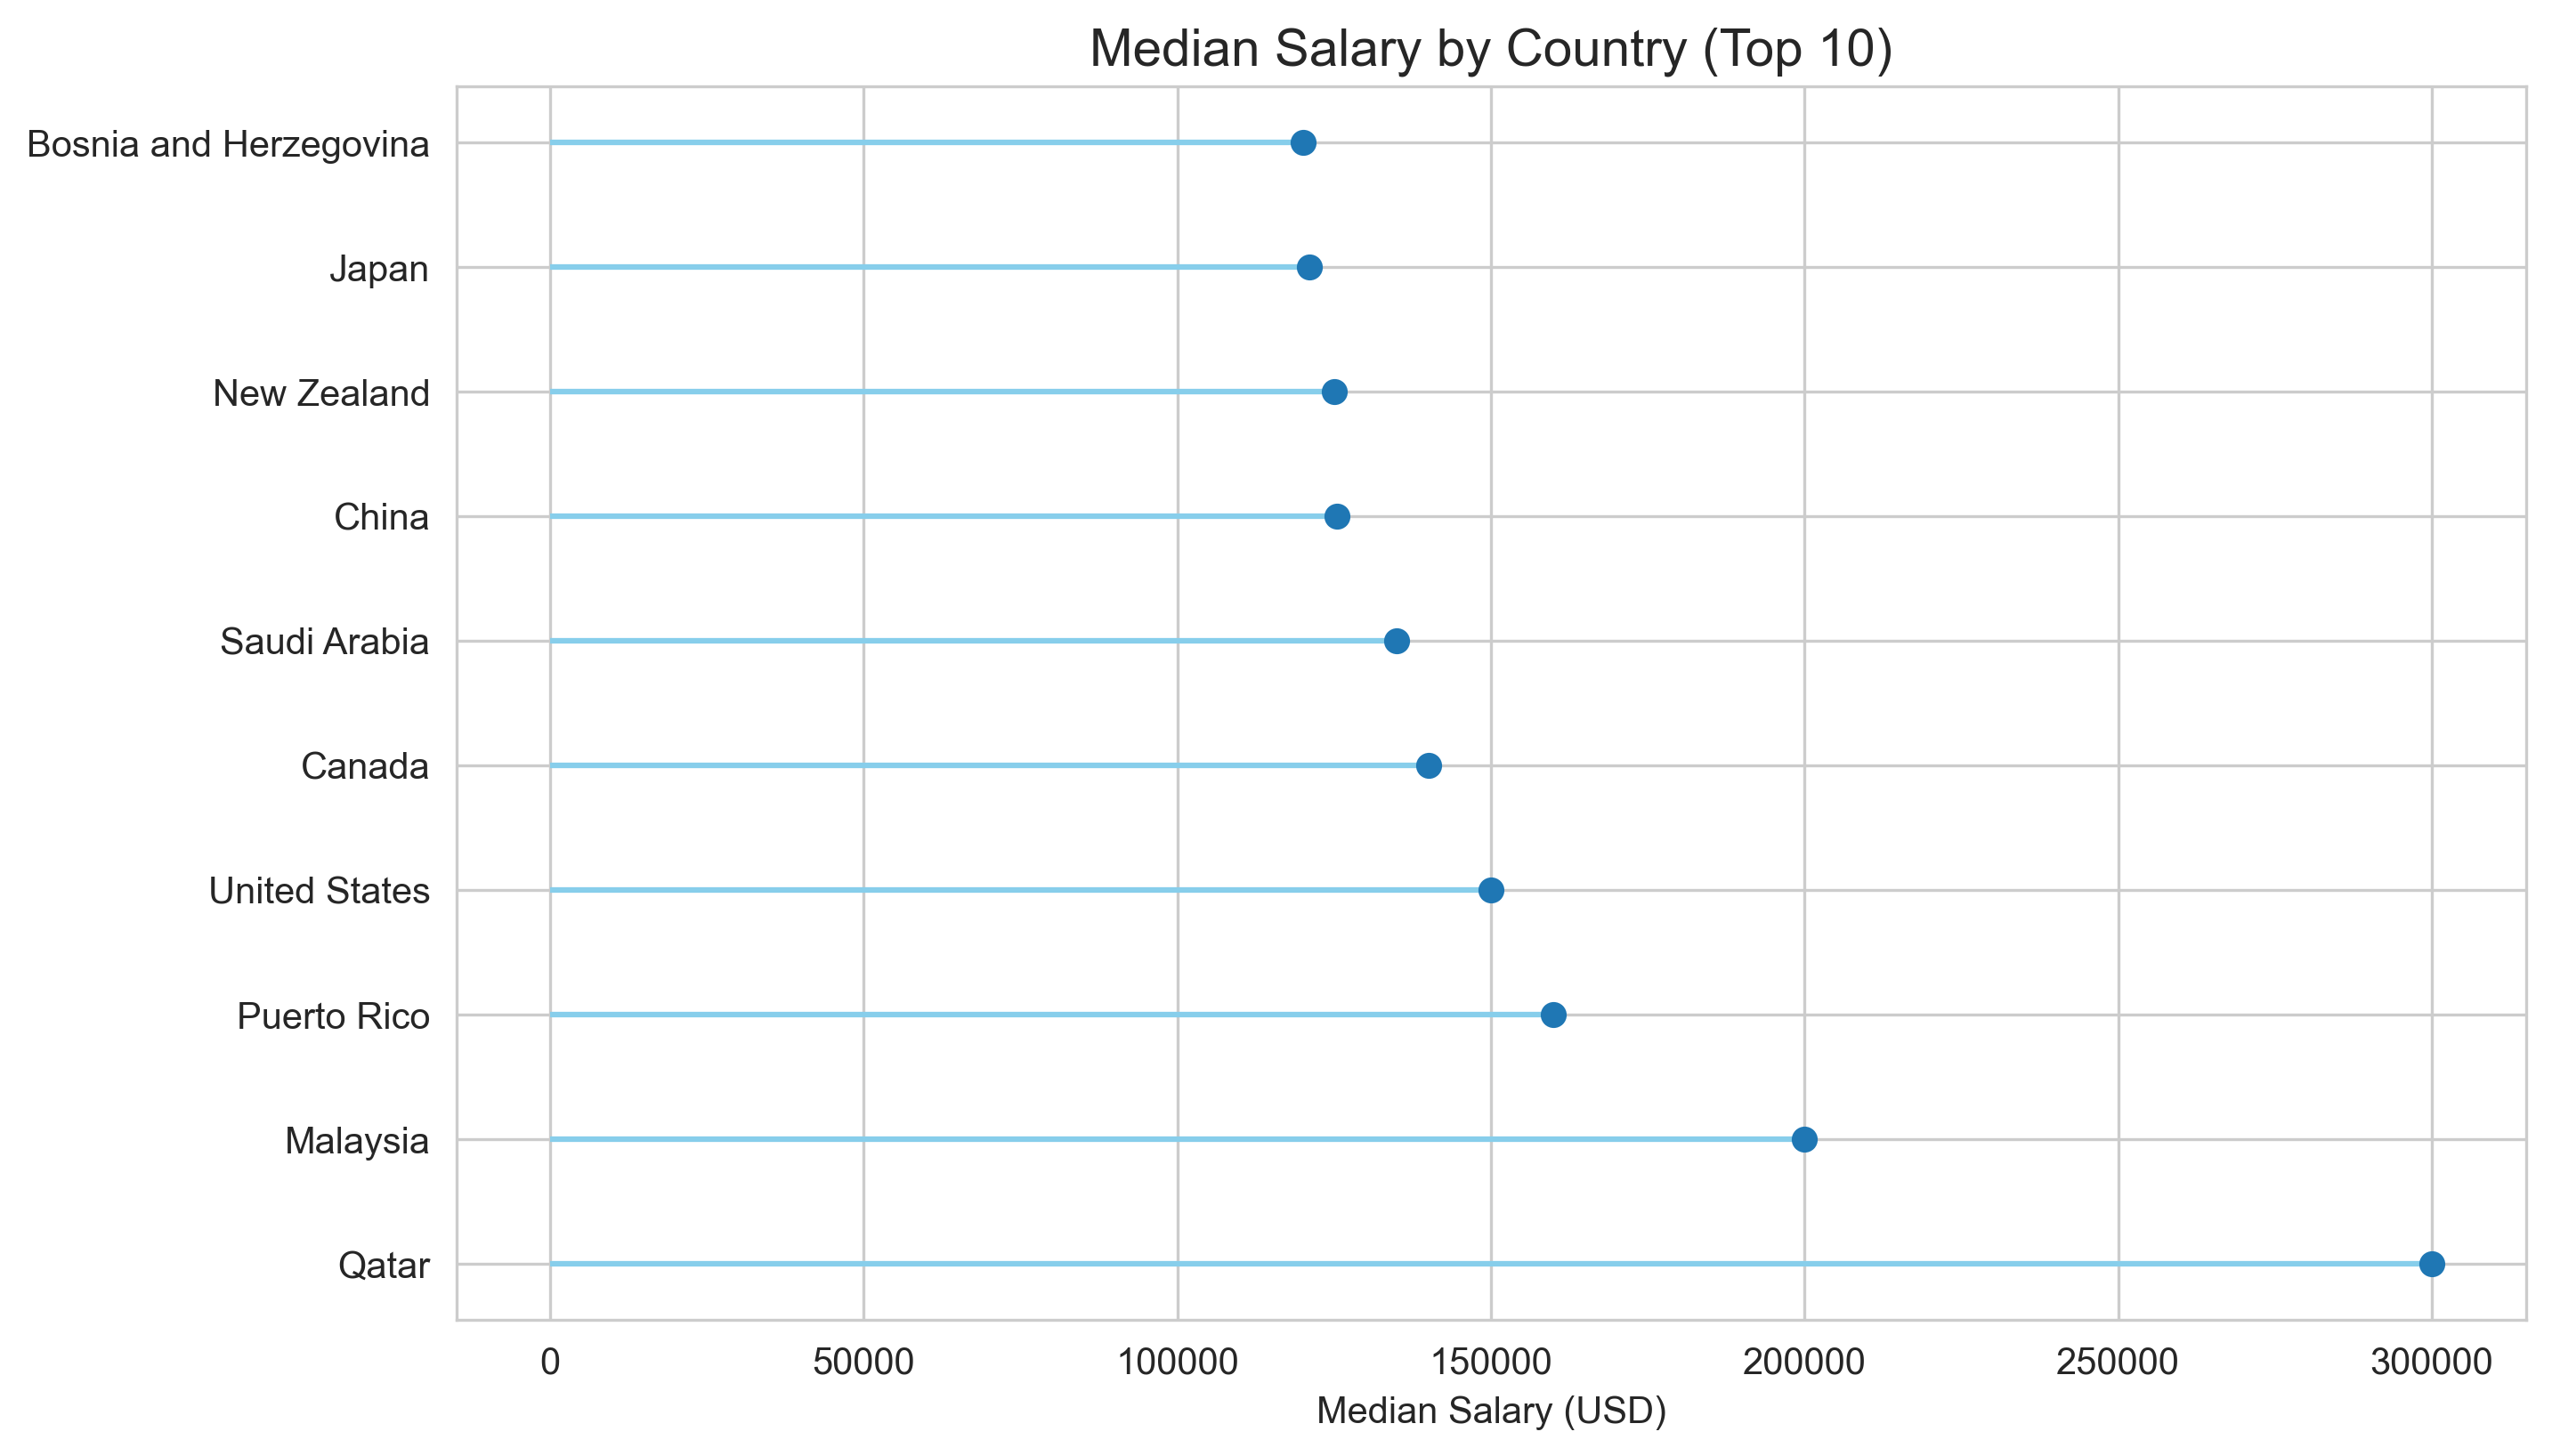

Saved Slide_15_CountrySalary.png


In [12]:

# --- Image 13 (Slide 15): Salary by Country Lollipop ---
country_sal = jobs.groupby('employee_residence')['salary_in_usd'].median().sort_values(ascending=False).head(10)
plt.figure()
plt.hlines(y=country_sal.index, xmin=0, xmax=country_sal.values, color='skyblue')
plt.plot(country_sal.values, country_sal.index, "o")
plt.title('Median Salary by Country (Top 10)', fontsize=14)
plt.xlabel('Median Salary (USD)')
plt.show()
save_plot("Slide_15_CountrySalary.png")


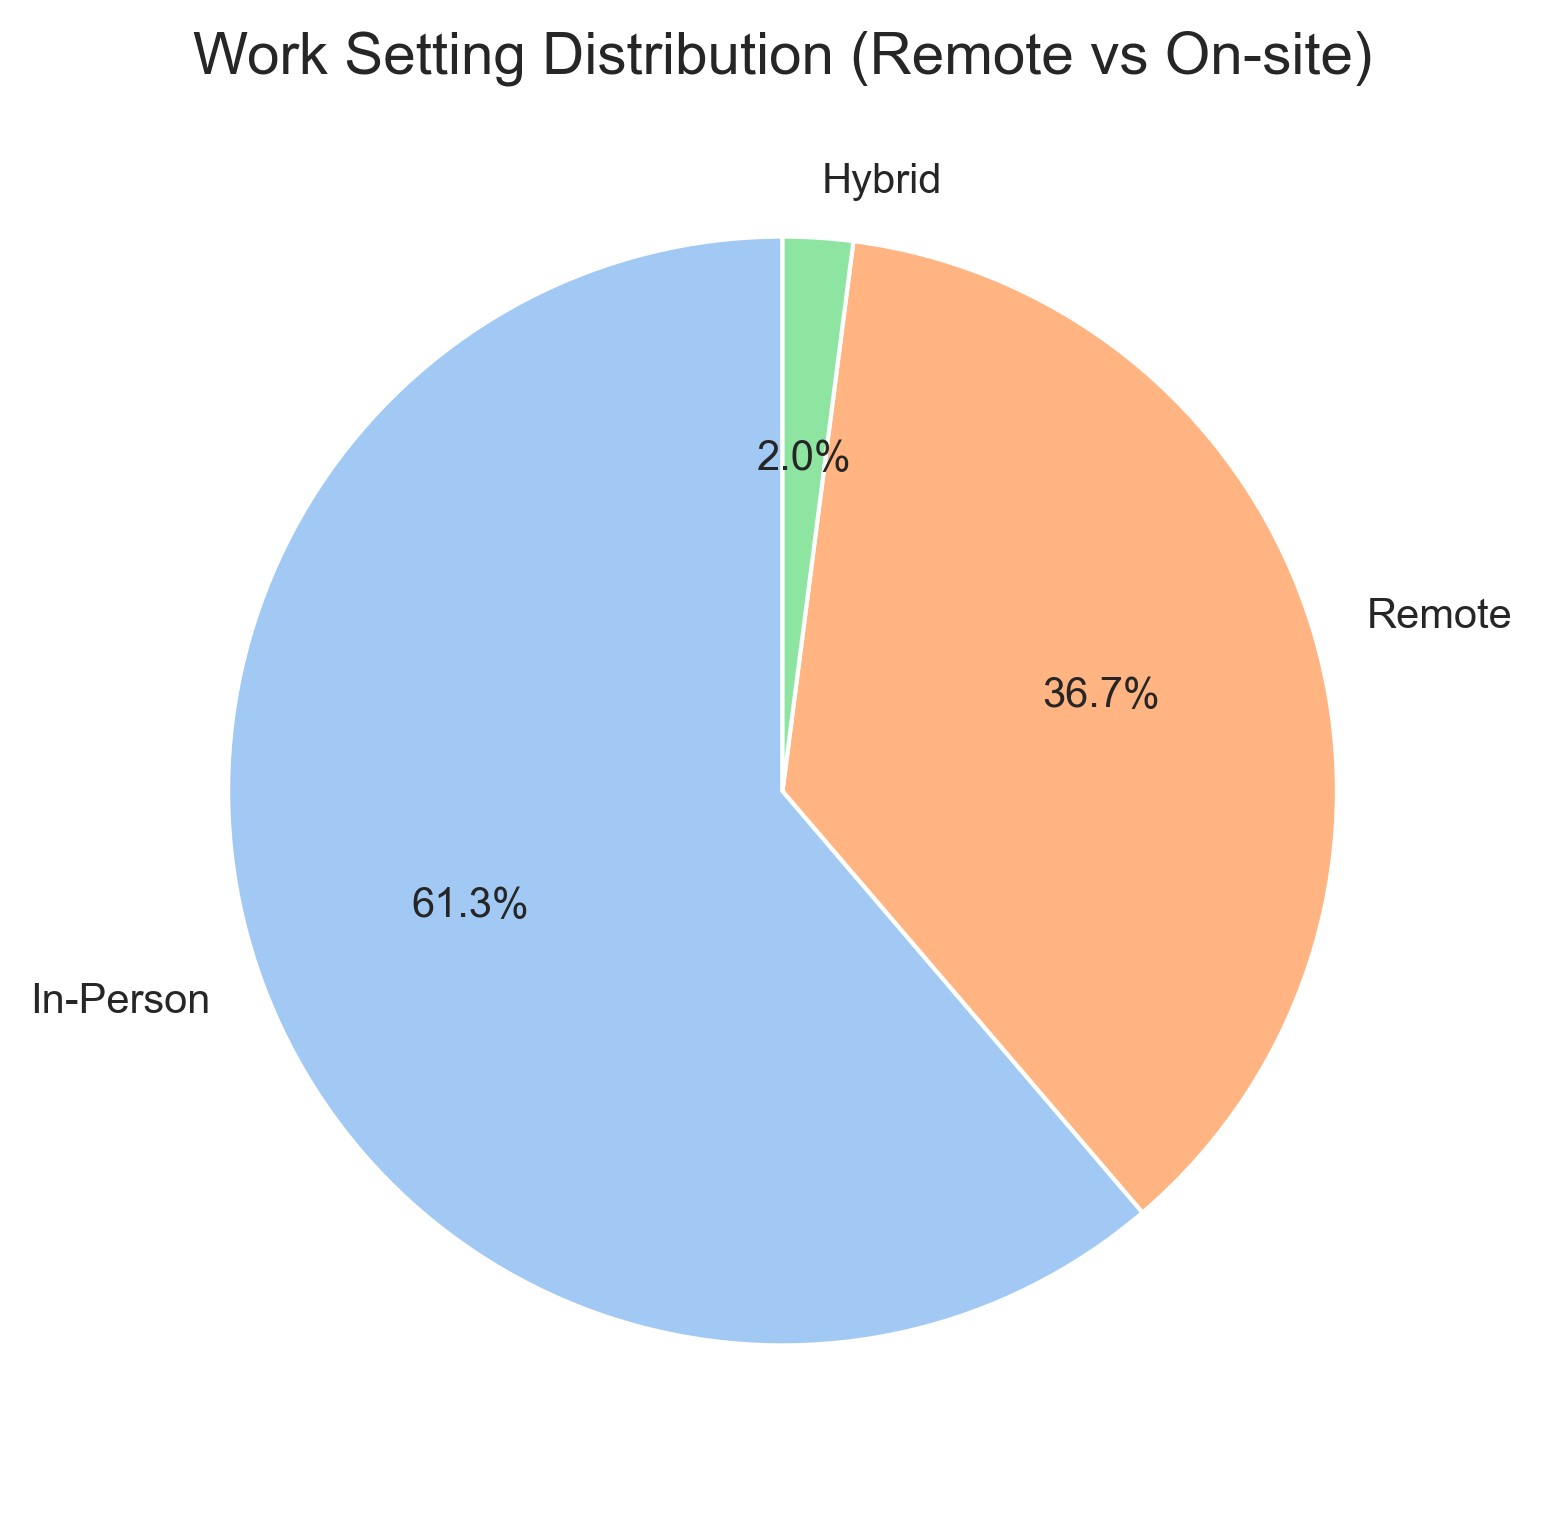

Saved Slide_16_WorkSettingPie.png


In [13]:

# --- Image 14 (Slide 16): Work Setting Pie ---
ws_counts = jobs['work_setting'].value_counts()
plt.figure()
plt.pie(ws_counts, labels=ws_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=90)
plt.title('Work Setting Distribution (Remote vs On-site)', fontsize=14)
plt.show()
save_plot("Slide_16_WorkSettingPie.png")


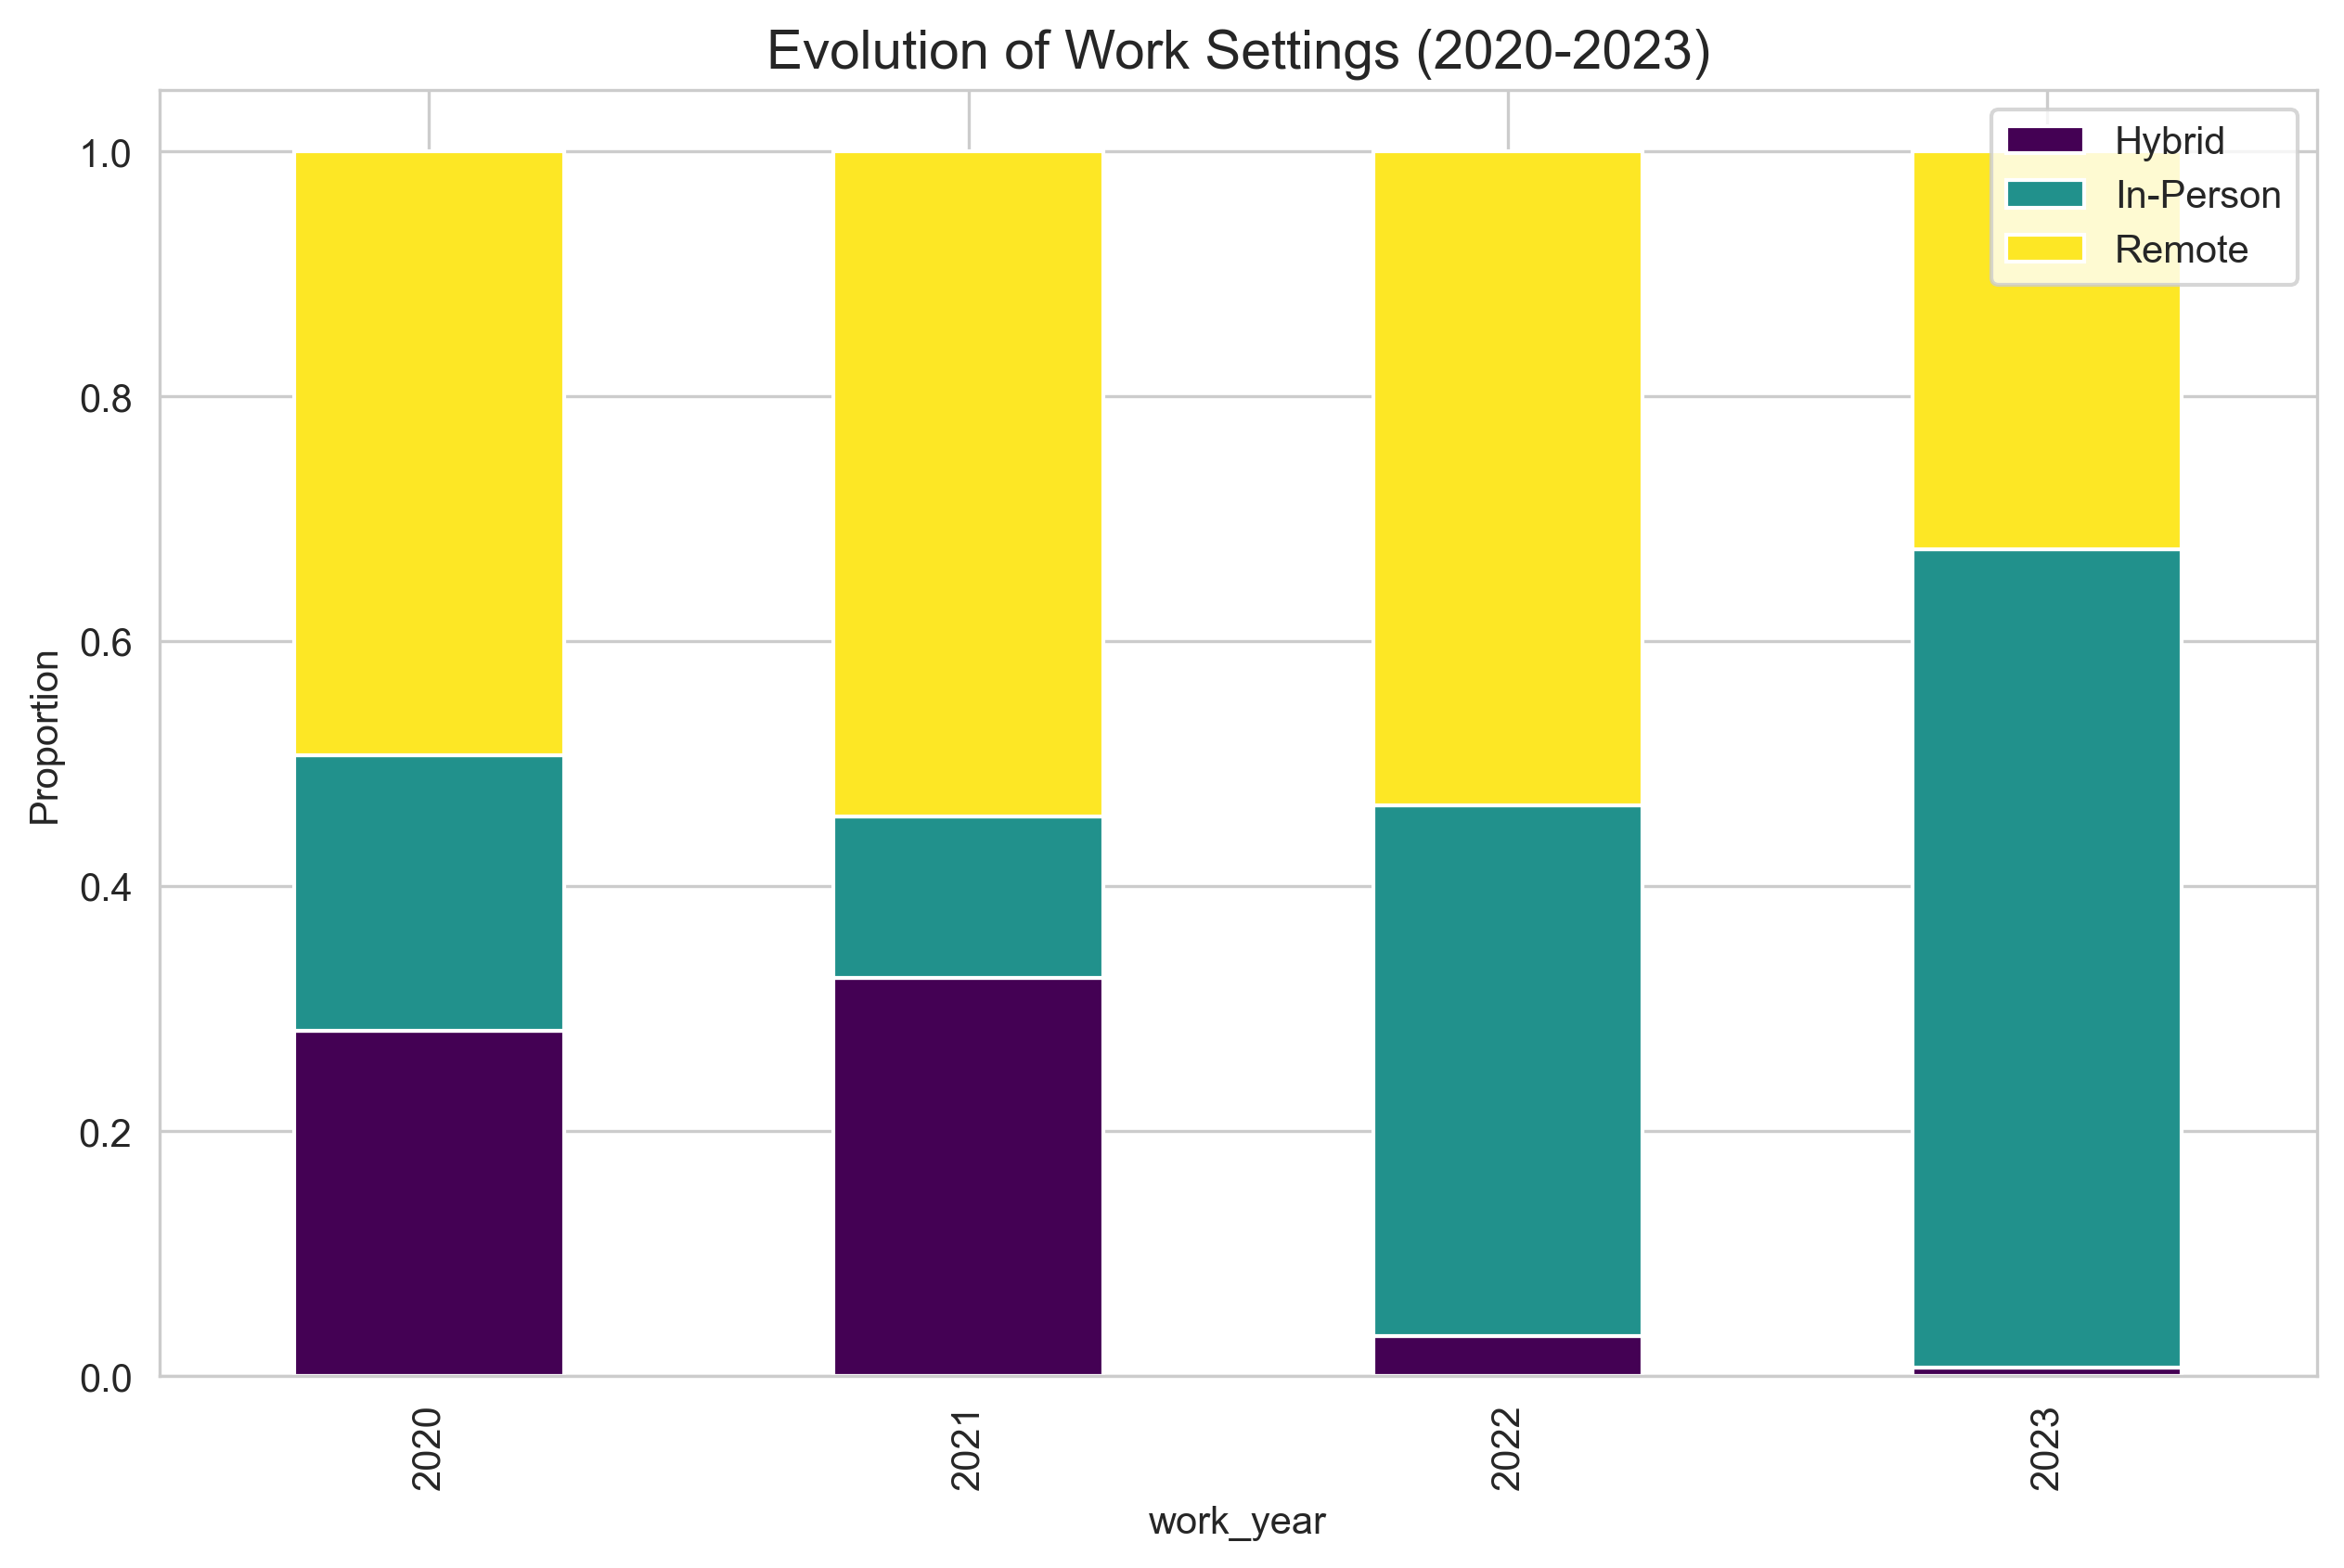

Saved Slide_17_WorkSettingStack.png


In [14]:

# --- Image 15 (Slide 17): Work Setting Stacked Bar ---
ws_year = pd.crosstab(jobs['work_year'], jobs['work_setting'], normalize='index')
ws_year.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Evolution of Work Settings (2020-2023)', fontsize=14)
plt.ylabel('Proportion')
plt.legend(loc='upper right')
plt.show()
save_plot("Slide_17_WorkSettingStack.png")


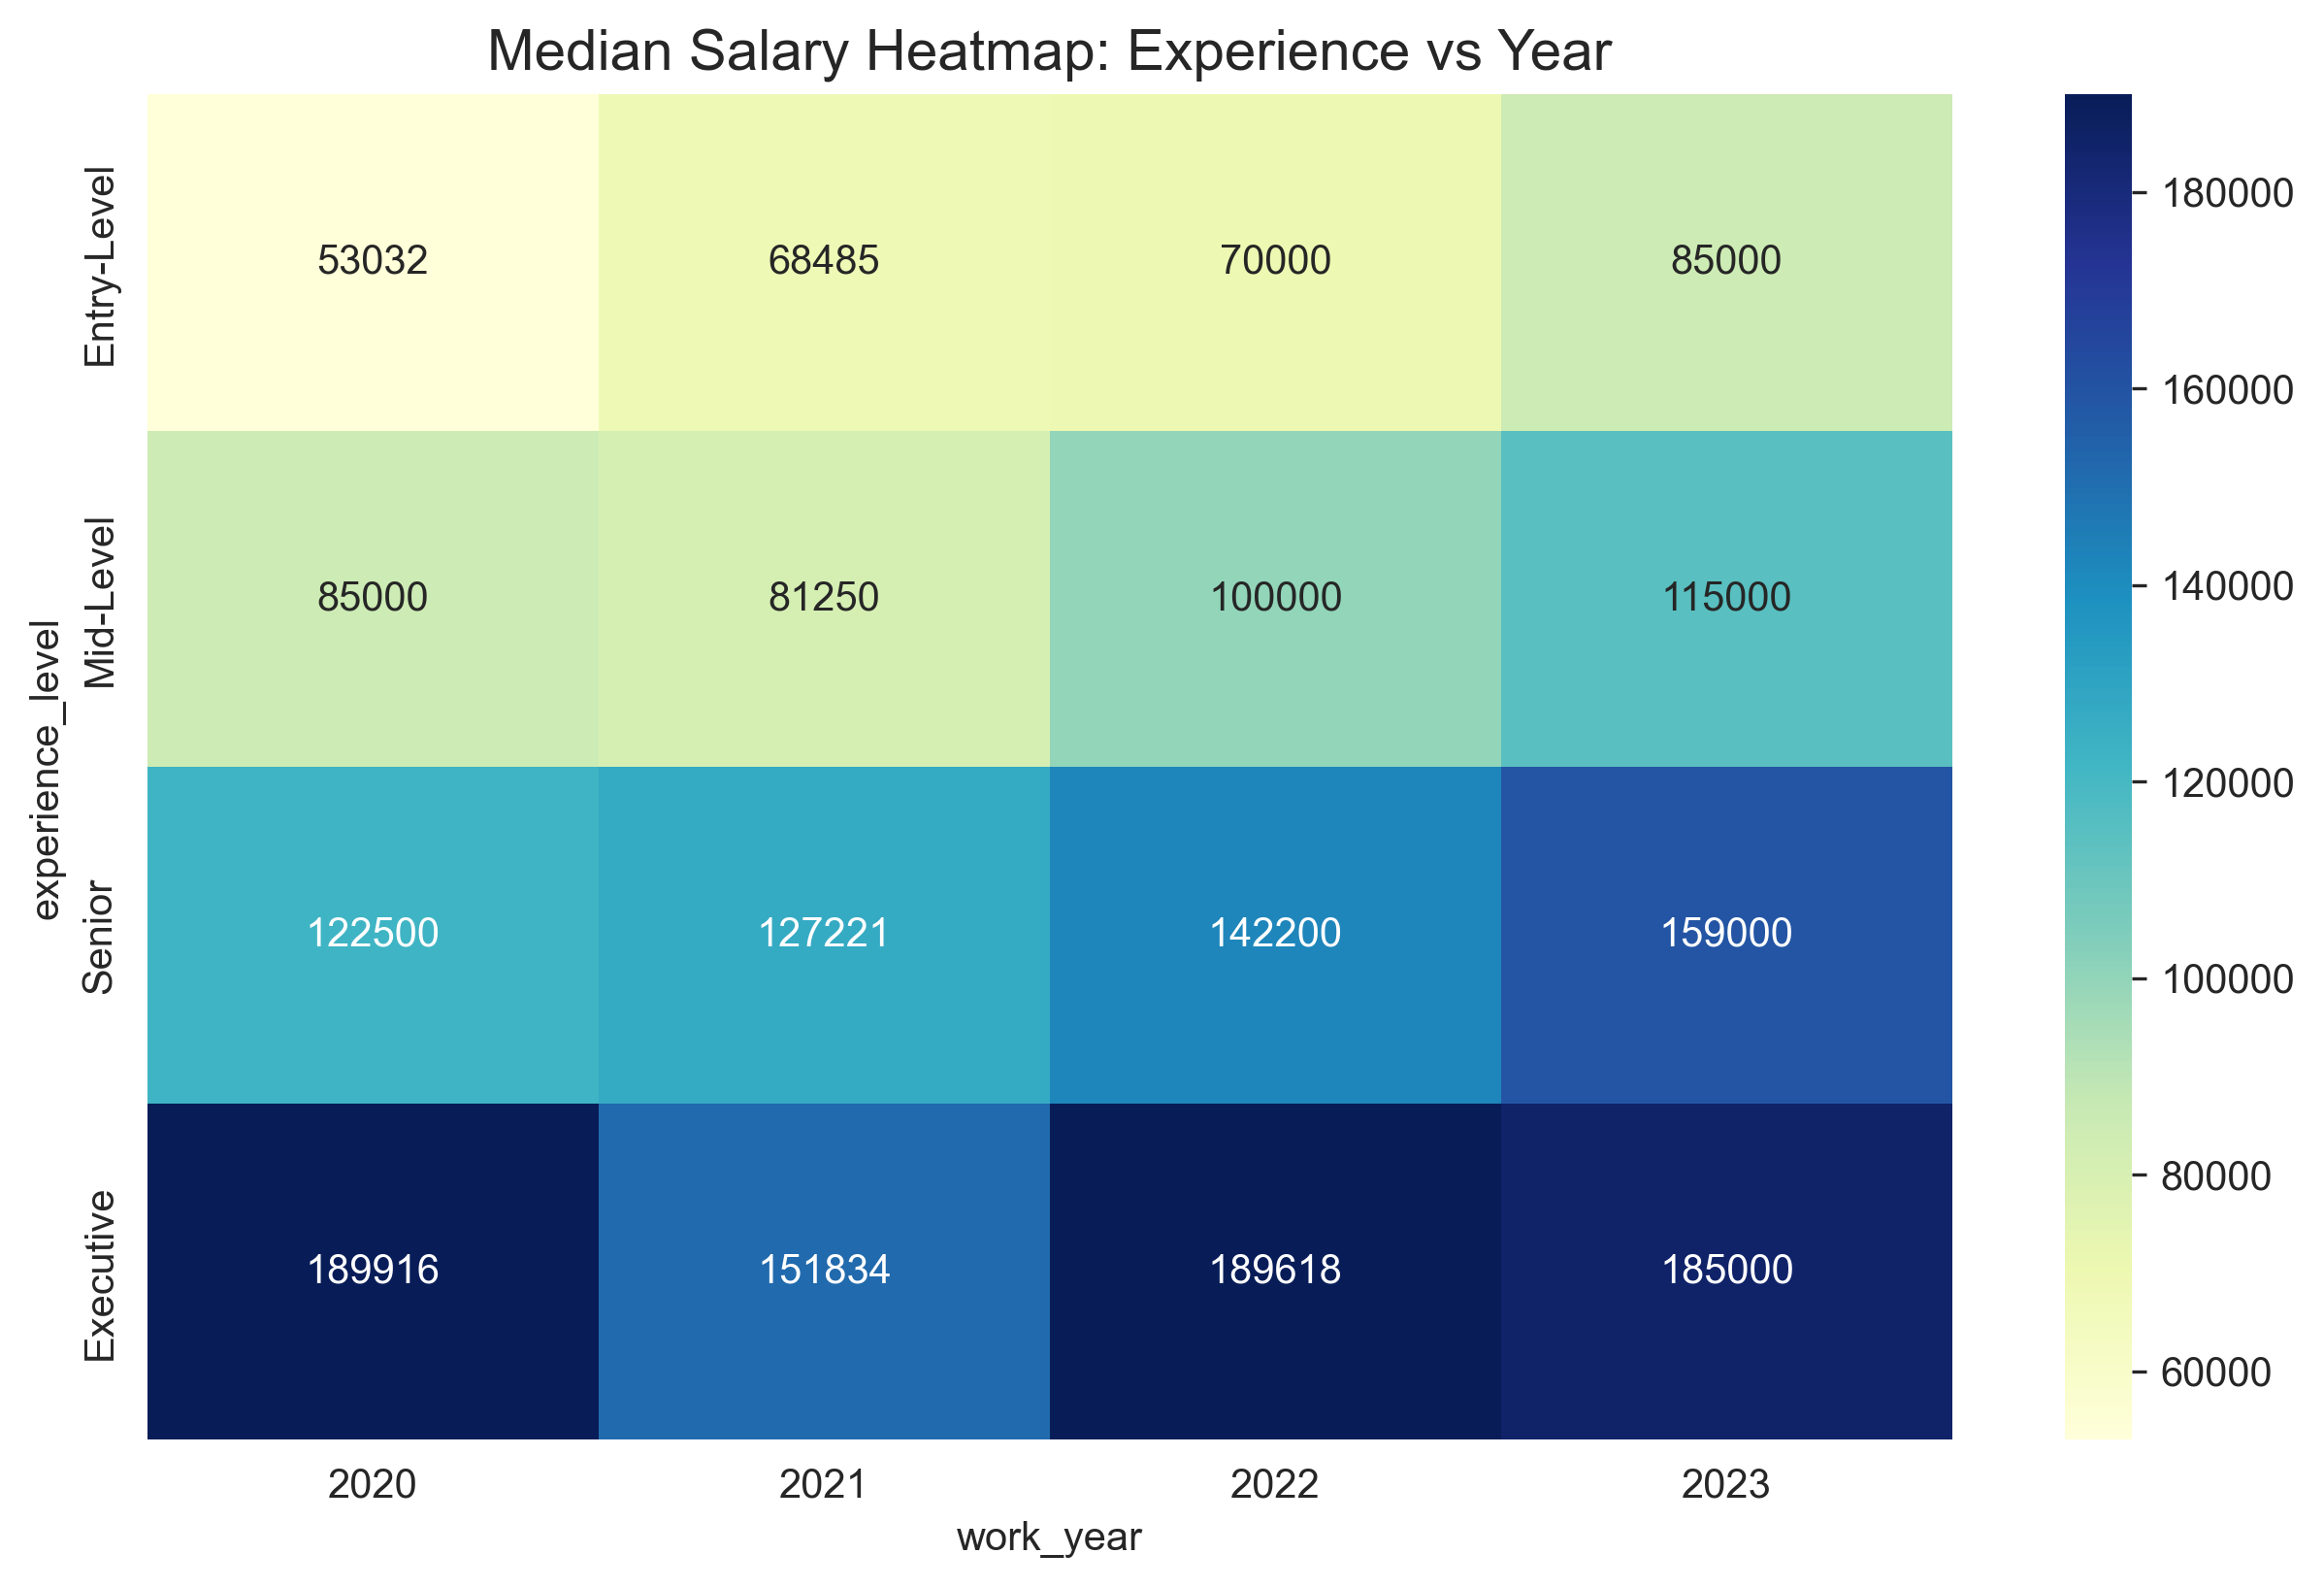

Saved Slide_18_SalaryHeatmap.png


In [15]:

# --- Image 16 (Slide 18): Heatmap ---
heatmap_data = jobs.pivot_table(index='experience_level', columns='work_year', values='salary_in_usd', aggfunc='median')
# Reorder index if needed
heatmap_data = heatmap_data.reindex(exp_order)
plt.figure()
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Median Salary Heatmap: Experience vs Year', fontsize=14)
plt.show()
save_plot("Slide_18_SalaryHeatmap.png")


In [20]:

# ==========================================
# POWERPOINT GENERATION
# ==========================================
print("Step 4: Creating PowerPoint...")

prs = Presentation()

# Helper to add slide with side-by-side Image + Text
def add_content_slide(title, bullets, image_filename=None):
    slide_layout = prs.slide_layouts[5] # Blank
    slide = prs.slides.add_slide(slide_layout)
    
    # Title
    title_shape = slide.shapes.title
    title_shape.text = title
    
    # Image (Left)
    if image_filename:
        img_path = os.path.join(IMG_DIR, image_filename)
        if os.path.exists(img_path):
            slide.shapes.add_picture(img_path, Inches(0.5), Inches(1.5), height=Inches(5))
            
    # Text (Right)
    textbox = slide.shapes.add_textbox(Inches(6.0), Inches(1.5), Inches(3.5), Inches(5))
    tf = textbox.text_frame
    tf.word_wrap = True
    
    if bullets:
        for bullet in bullets:
            p = tf.add_paragraph()
            p.text = bullet
            p.level = 0
            p.space_after = Pt(10)

# --- Slide 1: Title ---
slide = prs.slides.add_slide(prs.slide_layouts[0])
slide.shapes.title.text = "Visualizing Tech Workforce Dynamics (2020–2025)"
slide.placeholders[1].text = "Layoffs, Salaries & Global Trends\nCourse: Data Visualization\nStudent: Mansi Thakrar"

# --- Slide 2: Motivation ---
add_content_slide("Why Study Tech Workforce Dynamics?", [
    "Post-COVID tech boom led to over-hiring, followed by corrections.",
    "Analyze resilience of salaries despite market volatility.",
    "Essential for career strategy and understanding global disparities.",
    "Visualization reveals hidden structures in economic data."
])

# --- Slide 3: Datasets ---
add_content_slide("Datasets Overview", [
    "Dataset 1: Tech Layoffs (Kaggle)",
    " - Timeline: 2020 - 2025",
    " - Fields: Company, Industry, Count, Country",
    "Dataset 2: Data Jobs (Kaggle)",
    " - Timeline: 2020 - 2023",
    " - Fields: Title, Salary, Experience, Work Setting"
])

# --- Slide 6: Layoffs Time ---
add_content_slide("Tech Layoffs Over Time", [
    "Clear peak in layoffs observed during 2022–2023.",
    "Market stabilization visible post-2024.",
    "Correlates with post-pandemic economic corrections."
], "Slide_06_LayoffsMonthly.png")

# --- Slide 7: Yearly ---
add_content_slide("Layoffs by Year", [
    "Sharp rise in 2022 compared to 2021.",
    "2023 remained high, marking the most volatile period.",
    "2024 shows signs of recovery."
], "Slide_07_LayoffsYearly.png")

# --- Slide 8: Companies ---
add_content_slide("Top 15 Companies by Layoffs", [
    "Major tech giants (Amazon, Meta, Google) dominate the totals.",
    "Reflects workforce resizing after massive growth phases.",
    "Company-level view highlights systemic industry shifts."
], "Slide_08_TopCompanies.png")

# --- Slide 9: Industry ---
add_content_slide("Layoffs by Industry", [
    "Retail, Consumer, and Transportation hit hardest.",
    "Hardware and Healthcare also show significant numbers.",
    "Useful for identifying sector-specific risks."
], "Slide_09_IndustryLayoffs.png")

# --- Slide 10: Boxplot ---
add_content_slide("Percentage Laid Off Distribution", [
    "High variance within industries.",
    "Boxplots reveal that while totals are high, many companies laid off smaller % of workforce.",
    "Outliers indicate total shutdowns or massive pivots."
], "Slide_10_PercBoxplot.png")

# --- Slide 11: Geo ---
add_content_slide("Global Layoff Distribution", [
    "United States dominates the dataset.",
    "India, Germany, and UK follow.",
    "Reflects the concentration of tech HQs in the US."
], "Slide_11_CountryLayoffs.png")

# --- Slide 12: Salary Hist ---
add_content_slide("Salary Distribution (Data Roles)", [
    "Right-skewed distribution.",
    "Most roles cluster between $100k - $150k.",
    "Long tail extends to $400k+, showing high ceiling for specialized roles."
], "Slide_12_SalaryHist.png")

# --- Slide 13: Salary Trend ---
add_content_slide("Median Salary Growth", [
    "Steady upward trend from 2020 to 2023.",
    "Indicates strong demand for data skills despite broader layoffs.",
    "Resilience of the specific Data/AI sector."
], "Slide_13_SalaryTrend.png")

# --- Slide 14: Experience ---
add_content_slide("Salary by Experience Level", [
    "Clear stratification: Entry < Mid < Senior < Executive.",
    "Executive roles show highest variance.",
    "Senior roles provide stable, high median compensation."
], "Slide_14_ExpSalary.png")

# --- Slide 15: Country Salary ---
add_content_slide("Global Salary Disparities", [
    "US offers highest median salaries.",
    "Significant gap between US and other major tech hubs.",
    "Important factor for remote work strategies."
], "Slide_15_CountrySalary.png")

# --- Slide 16: Work Setting ---
add_content_slide("Work Setting Distribution", [
    "In-person and Remote were historically dominant.",
    "Recent trends show shifts in how work is structured.",
    "Visual shows the aggregate composition of the dataset."
], "Slide_16_WorkSettingPie.png")

# --- Slide 17: Setting Stack ---
add_content_slide("Work Setting Evolution", [
    "Drastic shift during 2020-2021 towards Remote.",
    "2023 shows return to In-person/Hybrid models.",
    "Reflects the 'Return to Office' mandates."
], "Slide_17_WorkSettingStack.png")

# --- Slide 18: Heatmap ---
add_content_slide("Salary Heatmap (Exp x Year)", [
    "Matrix view of compensation.",
    "Executive salaries in 2023 show the 'hottest' zones.",
    "Consistent growth across all levels year-over-year."
], "Slide_18_SalaryHeatmap.png")

# --- Final Slides ---
add_content_slide("Key Insights", [
    "Layoffs peaked in 2022-23 but salaries in Data roles kept growing.",
    "US market drives both layoffs and highest compensation.",
    "Experience level is the strongest predictor of salary.",
    "Hybrid/In-person work is recovering share from fully remote."
])

add_content_slide("Conclusion", [
    "Tech workforce is stabilizing after a volatile correction.",
    "Data Visualization clarifies complex temporal and categorical trends.",
    "Future work: Add 2024 salary data and predictive modeling."
])

# Save the PPT
today = datetime.now().strftime("%Y-%m-%d")
output_file = f"Tech_Workforce_Analysis_{today}.pptx"
prs.save(output_file)
print(f"Done! Presentation saved as {output_file}")

Step 4: Creating PowerPoint...
Done! Presentation saved as Tech_Workforce_Analysis_2025-11-26.pptx
